# Proyecto 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Importación, unificación y limpiado de datos

In [2]:
# open a spss file and convert it to a pandas dataframe

df2010 = pd.read_spss("2010.sav")
df2011 = pd.read_spss("2011.sav")
df2012 = pd.read_spss("2012.sav")
df2013 = pd.read_spss("2013.sav")
df2014 = pd.read_spss("2014.sav")
df2015 = pd.read_spss("2015.sav")
df2016 = pd.read_spss("2016.sav")
df2017 = pd.read_spss("2017.sav")
df2018 = pd.read_spss("2018.sav")
df2019 = pd.read_spss("2019.sav")


# por si se desea ver los datos de con todas las columnas
# with pd.option_context('display.max_rows', 5, 'display.max_columns', None): 
#     display(df2019)

df2019.columns.to_list(), len(df2019.columns.to_list())

(['DEPREG',
  'MUPREG',
  'MESREG',
  'AÑOREG',
  'AÑOOCU',
  'CLAUNI',
  'NUNUHO',
  'NUNUMU',
  'EDADHOM',
  'EDADMUJ',
  'PUEHOM',
  'PUEMUJ',
  'NACHOM',
  'NACMUJ',
  'ESCHOM',
  'ESCMUJ',
  'CIUOHOM',
  'CIUOMUJ',
  'DEPOCU',
  'MUPOCU',
  'DIAOCU',
  'MESOCU'],
 22)

#### Arreglando la columna AÑOOCU

In [3]:
df2010.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)
df2011.rename(columns={'Añoocu':'AÑOOCU'}, inplace=True)


In [4]:
df2012[['AÑOOCU']] = 2012.0
df2013[['AÑOOCU']] = 2013.0
df2014[['AÑOOCU']] = 2014.0

#### Arreglando la columna GETHOM

In [5]:
#Variables iguales en todos los años
#Depreg, mupreg, mesreg, añoreg, clauni(hay que ver que los espacios ten bien), Edadhom, Edadmuj, Nachom, Nacmuj, ESCHOM, ESCMUJ, CIUOHOM(ocuhom),CIUOMUJ(ocumuj), depocu, mupocu, Diaocu	


# FIX GETHOM AND PUEHOM
df2013[['GETHOM']] = 'No indigena'
df2013.loc[df2013['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2013.loc[df2013['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2014[['GETHOM']] = 'No indigena'
df2014.loc[df2014['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2014.loc[df2014['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2015[['GETHOM']] = 'No indigena'
df2015.loc[df2015['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2015.loc[df2015['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2016[['GETHOM']] = 'No indigena'
df2016.loc[df2016['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2016.loc[df2016['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2017[['GETHOM']] = 'No indigena'
df2017.loc[df2017['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2017.loc[df2017['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2018[['GETHOM']] = 'No indigena'
df2018.loc[df2018['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2018.loc[df2018['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'


df2019[['GETHOM']] = 'No indigena'
df2019.loc[df2019['PUEHOM'] == 'Maya', 'GETHOM'] = 'Indigena'
df2019.loc[df2019['PUEHOM'] == 'Ignorado', 'GETHOM'] = 'Ignorado'

df2019[['GETHOM', 'PUEHOM']]


,GETHOM,PUEHOM
0,No indigena,Ladino / Mestizo
1,No indigena,Ladino / Mestizo
2,No indigena,Ladino / Mestizo
3,No indigena,Otro
4,No indigena,Ladino / Mestizo
...,...,...
76923,No indigena,Ladino / Mestizo
76924,Indigena,Maya
76925,No indigena,Ladino / Mestizo
76926,No indigena,Ladino / Mestizo


#### Arreglando la columna GETMUJ

In [6]:
# FIX GETMUJ AND PUEMUJ
df2013[['GETMUJ']] = 'No indigena'
df2013.loc[df2013['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2013.loc[df2013['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2014[['GETMUJ']] = 'No indigena'
df2014.loc[df2014['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2014.loc[df2014['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2015[['GETMUJ']] = 'No indigena'
df2015.loc[df2015['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2015.loc[df2015['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2016[['GETMUJ']] = 'No indigena'
df2016.loc[df2016['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2016.loc[df2016['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2017[['GETMUJ']] = 'No indigena'
df2017.loc[df2017['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2017.loc[df2017['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2018[['GETMUJ']] = 'No indigena'
df2018.loc[df2018['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2018.loc[df2018['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'


df2019[['GETMUJ']] = 'No indigena'
df2019.loc[df2019['PUEMUJ'] == 'Maya', 'GETMUJ'] = 'Indigena'
df2019.loc[df2019['PUEMUJ'] == 'Ignorado', 'GETMUJ'] = 'Ignorado'

df2019[['GETMUJ', 'PUEMUJ']]

,GETMUJ,PUEMUJ
0,No indigena,Ladino / Mestizo
1,No indigena,Ladino / Mestizo
2,No indigena,Ladino / Mestizo
3,No indigena,Ladino / Mestizo
4,No indigena,Ladino / Mestizo
...,...,...
76923,No indigena,Otro
76924,Ignorado,Ignorado
76925,Ignorado,Ignorado
76926,No indigena,Ladino / Mestizo


#### Arreglando las columnas de 2010

In [7]:
df2010.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
df2010

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,Areag
0,Sacatepequez,Jocotenango,Febrero,2010.0,Comunidad de gananciales,28.0,26.0,No indigena,No indigena,Guatemala,...,Ignorado,Ignorado,Otros miembros de las fuerzas armadas,Otros miembros de las fuerzas armadas,Sacatepequez,Jocotenango,7.0,Febrero,2010.0,Urbano
1,Suchitepequez,Mazatenango,Diciembre,2010.0,Comunidad de gananciales,28.0,20.0,No indigena,No indigena,Guatemala,...,Primaria,Primaria,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18.0,Diciembre,2010.0,Urbano
2,Guatemala,Guatemala,Diciembre,2010.0,Comunidad de gananciales,25.0,22.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ignorado,Estudiante,Otros miembros de las fuerzas armadas,Guatemala,Guatemala,10.0,Marzo,2010.0,Urbano
3,Guatemala,Guatemala,Mayo,2010.0,Comunidad de gananciales,45.0,41.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ninguno,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27.0,Febrero,2010.0,Urbano
4,Sacatepequez,Santa María de Jesús,Diciembre,2010.0,Separación absoluta,35.0,27.0,Indigena,Ignorado,Guatemala,...,Primaria,Ninguno,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9.0,Diciembre,2010.0,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73119,Guatemala,San José Pinula,Noviembre,2010.0,Comunidad de gananciales,53.0,40.0,No indigena,No indigena,Estados Unidos de América,...,Ninguno,Ninguno,Ignorado,Ignorado,Guatemala,San José Pinula,29.0,Enero,2010.0,Urbano
73120,Chiquimula,Chiquimula,Septiembre,2010.0,Comunidad de gananciales,31.0,32.0,No indigena,No indigena,Uruguay,...,Ninguno,Ninguno,Ignorado,Ignorado,Chiquimula,Chiquimula,22.0,Mayo,2010.0,Urbano
73121,Guatemala,Guatemala,Febrero,2011.0,Comunidad de gananciales,52.0,45.0,Ignorado,No indigena,Francia,...,Ninguno,Diversificado,Ignorado,Ignorado,Guatemala,Guatemala,2.0,Marzo,2010.0,Urbano
73122,Guatemala,Guatemala,Febrero,2011.0,Comunidad absoluta,34.0,33.0,Ignorado,No indigena,República de Libano,...,Universitario,Universitario,Ignorado,Ignorado,Guatemala,Guatemala,18.0,Diciembre,2010.0,Urbano


#### Arreglando columnas de 2011

In [8]:
df2011.rename(columns={'Depreg': 'DEPREG', 'mupreg': 'MUPREG', 'Mesreg':'MESREG', 'Añoreg':'AÑOREG', 'Clauni':'CLAUNI', 'Edadhom': 'EDADHOM', 'Edadmuj': 'EDADMUJ', 'Nachom':'NACHOM', 'Nacmuj':'NACMUJ', 'Eschom':'ESCHOM', 'Escmuj': 'ESCMUJ', 'Ocuhom':'CIUOHOM', 'Ocumuj':'CIUOMUJ', 'Depocu': 'DEPOCU', 'mupocu':'MUPOCU', 'Diaocu':'DIAOCU', 'Mesocu':'MESOCU', 'Gethom':'GETHOM', 'Getmuj':'GETMUJ'}, inplace=True)
df2011

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,Areag
0,Guatemala,Guatemala,Diciembre,2011.0,Comunidad de gananciales,27.0,32.0,Ignorado,No indigena,Canadá,...,Ignorado,Universitario,Oficiales de las fuerzas armadas,Oficiales de las fuerzas armadas,Guatemala,Guatemala,20.0,Septiembre,2011.0,Urbano
1,Guatemala,Mixco,Enero,2012.0,Separación absoluta,29.0,31.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ninguno,Oficiales de las fuerzas armadas,Oficiales de las fuerzas armadas,Guatemala,Mixco,12.0,Noviembre,2011.0,Urbano
2,Totonicapan,Totonicapán,Diciembre,2011.0,Comunidad de gananciales,21.0,17.0,Indigena,Ignorado,Guatemala,...,Ignorado,Ninguno,"Sastres, modistos, peleteros y sombrereros",Cocineros,Totonicapan,Totonicapán,12.0,Diciembre,2011.0,Urbano
3,Guatemala,Guatemala,Noviembre,2011.0,Separación absoluta,58.0,53.0,Ignorado,Ignorado,Guatemala,...,Ninguno,Ninguno,Arquitectos,Miembros del poder legislativo,Guatemala,Guatemala,25.0,Octubre,2011.0,Urbano
4,Guatemala,San José Pinula,Noviembre,2011.0,Comunidad de gananciales,31.0,24.0,No indigena,No indigena,Guatemala,...,Universitario,Diversificado,Directores generales y gerentes generales,Directores generales y gerentes generales,Guatemala,San José Pinula,2.0,Octubre,2011.0,Urbano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78281,Quiche,San Pedro Jocopilas,Julio,2011.0,Comunidad de gananciales,15.0,15.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,5.0,Julio,2011.0,Ignorado
78282,Quiche,San Pedro Jocopilas,Julio,2011.0,Comunidad de gananciales,17.0,14.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,24.0,Junio,2011.0,Ignorado
78283,Quiche,San Pedro Jocopilas,Agosto,2011.0,Comunidad de gananciales,17.0,16.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,27.0,Julio,2011.0,Ignorado
78284,Quiche,San Pedro Jocopilas,Octubre,2011.0,Comunidad de gananciales,18.0,18.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ignorado,Ignorado,Ignorado,Quiche,San Pedro Jocopilas,4.0,Octubre,2011.0,Ignorado


#### Arreglando las columnas de 2012

In [9]:
df2012.rename(columns={'OCUHOM':'CIUOHOM', 'OCUMUJ': 'CIUOMUJ'}, inplace=True)
df2012

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,GETHOM,GETMUJ,NACHOM,...,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AREAG,AÑOOCU
0,Sacatepequez,Antigua Guatemala,Diciembre,2012.0,Comunidad de gananciales,56.0,43.0,Ignorado,No indigena,Estados Unidos de América,...,Universitario,Universitario,Miembros del poder legislativo,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,24.0,Noviembre,Urbano,2012.0
1,Sacatepequez,Antigua Guatemala,Enero,2013.0,Separación absoluta,38.0,37.0,No indigena,No indigena,Guatemala,...,Universitario,Universitario,Directores de administración y servicios no cl...,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,31.0,Diciembre,Urbano,2012.0
2,Sacatepequez,Antigua Guatemala,Noviembre,2012.0,Comunidad de gananciales,30.0,27.0,No indigena,No indigena,Estados Unidos de América,...,Universitario,Universitario,Agrónomos y afines,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,3.0,Noviembre,Urbano,2012.0
3,Guatemala,Guatemala,Marzo,2013.0,Comunidad de gananciales,29.0,30.0,No indigena,No indigena,Guatemala,...,Universitario,Universitario,Analistas de gestión y organización,Directores generales y gerentes generales,Guatemala,Guatemala,28.0,Diciembre,Urbano,2012.0
4,Sacatepequez,Antigua Guatemala,Julio,2012.0,Comunidad de gananciales,48.0,32.0,No indigena,Ignorado,Gran Bretaña,...,Diversificado,Ignorado,Analistas de gestión y organización,Directores generales y gerentes generales,Sacatepequez,Antigua Guatemala,17.0,Marzo,Rural,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84248,Chiquimula,Concepción Las Minas,Mayo,2012.0,Comunidad de gananciales,23.0,16.0,Ignorado,No indigena,Estados Unidos de América,...,Ignorado,Ignorado,Ignorado,Ignorado,Chiquimula,Concepción Las Minas,27.0,Enero,Urbano,2012.0
84249,Huehuetenango,Huehuetenango,Octubre,2012.0,Comunidad de gananciales,32.0,26.0,Indigena,Ignorado,Guatemala,...,Primaria,Ignorado,Ignorado,Ignorado,Huehuetenango,Huehuetenango,15.0,Agosto,Urbano,2012.0
84250,Retalhuleu,San Felipe,Junio,2012.0,Comunidad de gananciales,40.0,35.0,Ignorado,Ignorado,Guatemala,...,Ignorado,Ninguno,Ignorado,Ignorado,Retalhuleu,San Felipe,16.0,Junio,Urbano,2012.0
84251,Guatemala,San José Pinula,Febrero,2012.0,Comunidad de gananciales,25.0,16.0,No indigena,No indigena,Guatemala,...,Universitario,Ninguno,Ignorado,Ignorado,Guatemala,San José Pinula,23.0,Febrero,Urbano,2012.0


#### Unificación final hacía un mismo dataframe

In [10]:
COL_CONSENSUS = ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'DEPOCU', 'MUPOCU', 'DIAOCU', 'MESOCU', 'AÑOOCU', 'GETHOM', 'GETMUJ']

frames_list = [df2010[COL_CONSENSUS], df2011[COL_CONSENSUS], df2012[COL_CONSENSUS], df2013[COL_CONSENSUS], df2014[COL_CONSENSUS], df2015[COL_CONSENSUS], df2016[COL_CONSENSUS], df2017[COL_CONSENSUS], df2018[COL_CONSENSUS], df2019[COL_CONSENSUS]]

marriage_data = pd.concat(frames_list)

marriage_data.columns

Index(['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'CLAUNI', 'EDADHOM', 'EDADMUJ',
       'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'DEPOCU',
       'MUPOCU', 'DIAOCU', 'MESOCU', 'AÑOOCU', 'GETHOM', 'GETMUJ'],
      dtype='object')

In [11]:
# Como no interesa tener un clustering basado en la edad, se eliminan los datos de edad que no aporten información al clustering
marriage_data = marriage_data[marriage_data['EDADHOM'] != 'Ignorado']
marriage_data = marriage_data[marriage_data['EDADMUJ'] != 'Ignorado']

marriage_data['AÑOREG'] = marriage_data['AÑOREG'].astype(int)
marriage_data['EDADHOM'] = marriage_data['EDADHOM'].astype(int)
marriage_data['EDADMUJ'] = marriage_data['EDADMUJ'].astype(int)
marriage_data['DIAOCU'] = marriage_data['DIAOCU'].astype(int)
marriage_data['AÑOOCU'] = marriage_data['AÑOOCU'].astype(int)

marriage_data


,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,GETHOM,GETMUJ
0,Sacatepequez,Jocotenango,Febrero,2010,Comunidad de gananciales,28,26,Guatemala,Guatemala,Ignorado,Ignorado,Otros miembros de las fuerzas armadas,Otros miembros de las fuerzas armadas,Sacatepequez,Jocotenango,7,Febrero,2010,No indigena,No indigena
1,Suchitepequez,Mazatenango,Diciembre,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,Primaria,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18,Diciembre,2010,No indigena,No indigena
2,Guatemala,Guatemala,Diciembre,2010,Comunidad de gananciales,25,22,Guatemala,Guatemala,Ninguno,Ignorado,Estudiante,Otros miembros de las fuerzas armadas,Guatemala,Guatemala,10,Marzo,2010,Ignorado,Ignorado
3,Guatemala,Guatemala,Mayo,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,Ninguno,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27,Febrero,2010,Ignorado,Ignorado
4,Sacatepequez,Santa María de Jesús,Diciembre,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,Ninguno,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9,Diciembre,2010,Indigena,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76923,Sacatepequez,Jocotenango,Diciembre,2019,Comunidad de gananciales,24,28,Guatemala,Estados Unidos de América,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Sacatepequez,Antigua Guatemala,26,Octubre,2019,No indigena,No indigena
76924,Quiche,Chichicastenango,Septiembre,2019,Comunidad de gananciales,30,28,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Quiche,Chichicastenango,30,Agosto,2019,Indigena,Ignorado
76925,Guatemala,Villa Canales,Enero,2020,Comunidad de gananciales,30,29,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Guatemala,Petapa,15,Diciembre,2019,No indigena,Ignorado
76926,Chiquimula,Chiquimula,Diciembre,2019,Comunidad de gananciales,44,39,Guatemala,Guatemala,Universitario,Diversificado,Profesionales de las ciencias y de la ingeniería,Ignorado,Zacapa,Zacapa,7,Diciembre,2019,No indigena,No indigena


#### Meses de registro y ocurrencia del matrimonio a valores enteros

In [12]:
# Transformamos MESOCU a un entero
marriage_data['MESOCU'] = marriage_data['MESOCU'].astype(str)
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Enero', '1')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Febrero', '2')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Marzo', '3')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Abril', '4')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Mayo', '5')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Junio', '6')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Julio', '7')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Agosto', '8')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Septiembre', '9')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Octubre', '10')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Noviembre', '11')
marriage_data['MESOCU'] = marriage_data['MESOCU'].str.replace('Diciembre', '12')
marriage_data['MESOCU'] = marriage_data['MESOCU'].astype(int)

In [13]:
# Transformamos MESREG a un entero
marriage_data['MESREG'] = marriage_data['MESREG'].astype(str)
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Enero', '1')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Febrero', '2')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Marzo', '3')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Abril', '4')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Mayo', '5')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Junio', '6')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Julio', '7')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Agosto', '8')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Septiembre', '9')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Octubre', '10')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Noviembre', '11')
marriage_data['MESREG'] = marriage_data['MESREG'].str.replace('Diciembre', '12')
marriage_data['MESREG'] = marriage_data['MESREG'].astype(int)


In [14]:
marriage_data

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,ESCMUJ,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,GETHOM,GETMUJ
0,Sacatepequez,Jocotenango,2,2010,Comunidad de gananciales,28,26,Guatemala,Guatemala,Ignorado,Ignorado,Otros miembros de las fuerzas armadas,Otros miembros de las fuerzas armadas,Sacatepequez,Jocotenango,7,2,2010,No indigena,No indigena
1,Suchitepequez,Mazatenango,12,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,Primaria,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18,12,2010,No indigena,No indigena
2,Guatemala,Guatemala,12,2010,Comunidad de gananciales,25,22,Guatemala,Guatemala,Ninguno,Ignorado,Estudiante,Otros miembros de las fuerzas armadas,Guatemala,Guatemala,10,3,2010,Ignorado,Ignorado
3,Guatemala,Guatemala,5,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,Ninguno,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27,2,2010,Ignorado,Ignorado
4,Sacatepequez,Santa María de Jesús,12,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,Ninguno,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9,12,2010,Indigena,Ignorado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76923,Sacatepequez,Jocotenango,12,2019,Comunidad de gananciales,24,28,Guatemala,Estados Unidos de América,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Sacatepequez,Antigua Guatemala,26,10,2019,No indigena,No indigena
76924,Quiche,Chichicastenango,9,2019,Comunidad de gananciales,30,28,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Quiche,Chichicastenango,30,8,2019,Indigena,Ignorado
76925,Guatemala,Villa Canales,1,2020,Comunidad de gananciales,30,29,Guatemala,Guatemala,Diversificado,Ignorado,Profesionales de la enseñanza,Ignorado,Guatemala,Petapa,15,12,2019,No indigena,Ignorado
76926,Chiquimula,Chiquimula,12,2019,Comunidad de gananciales,44,39,Guatemala,Guatemala,Universitario,Diversificado,Profesionales de las ciencias y de la ingeniería,Ignorado,Zacapa,Zacapa,7,12,2019,No indigena,No indigena


#### Agregando valor a la escolaridad

In [15]:
# get all the unique values of the column ESCMUJ
marriage_data['ESCMUJ'].unique()

array(['Ignorado', 'Primaria', 'Ninguno', 'Diversificado',
       'Universitario', 'Básico', 'DIversificado', 'Postgrado',
       'Post Grado'], dtype=object)

In [16]:
# Transformamos ESCMUJ a un entero
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJ'].astype(str)
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Ignorado', '-1')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Ninguno', '0')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Primaria', '1')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Básico', '2')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Diversificado', '3')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('DIversificado', '3')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Universitario', '4')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Postgrado', '5')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].str.replace('Post Grado', '5')
marriage_data['ESCMUJINT'] = marriage_data['ESCMUJINT'].astype(int)

marriage_data = marriage_data[marriage_data['ESCMUJINT'] >= 0]

marriage_data

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,...,CIUOHOM,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,GETHOM,GETMUJ,ESCMUJINT
1,Suchitepequez,Mazatenango,12,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,...,Carpinteros de armar y de obra blanca,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18,12,2010,No indigena,No indigena,1
3,Guatemala,Guatemala,5,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,...,Economistas,Miembros del poder legislativo,Guatemala,Mixco,27,2,2010,Ignorado,Ignorado,0
4,Sacatepequez,Santa María de Jesús,12,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,...,Maestros de enseñanza primaria,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9,12,2010,Indigena,Ignorado,0
5,Guatemala,Guatemala,3,2010,Comunidad de gananciales,31,35,Guatemala,Guatemala,Ninguno,...,Chefs,Directores generales y gerentes generales,Guatemala,Guatemala,20,2,2010,Ignorado,Ignorado,0
7,Suchitepequez,Santo Tomás la Unión,4,2011,Comunidad de gananciales,34,35,Guatemala,República Dominicana,Ninguno,...,Comerciantes de tiendas,Directores generales y gerentes generales,Suchitepequez,Santo Tomás la Unión,24,7,2010,Ignorado,Ignorado,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76905,Zacapa,Río Hondo,10,2019,Comunidad de gananciales,26,26,Guatemala,Guatemala,Diversificado,...,Técnicos de la tecnología de la información y ...,Ignorado,Zacapa,Río Hondo,20,10,2019,No indigena,No indigena,3
76907,Chiquimula,San Jacinto,10,2019,Comunidad de gananciales,29,19,Guatemala,Guatemala,Diversificado,...,Profesionales de nivel medio de servicios jurí...,Ignorado,Chiquimula,San Jacinto,11,10,2019,Ignorado,No indigena,2
76917,San Marcos,Pajapita,11,2019,Comunidad de gananciales,22,19,Guatemala,Guatemala,Diversificado,...,Profesionales de las ciencias y la ingeniería ...,Ignorado,San Marcos,Pajapita,16,11,2019,No indigena,No indigena,1
76921,Chiquimula,San Jacinto,10,2019,Comunidad de gananciales,28,19,Guatemala,Guatemala,Universitario,...,Profesionales de la enseñanza,Ignorado,Chiquimula,San Jacinto,8,10,2019,Indigena,No indigena,2


In [17]:
marriage_data['ESCHOM'].unique()

array(['Primaria', 'Ninguno', 'Diversificado', 'Universitario',
       'Ignorado', 'Básico', 'DIversificado', 'Postgrado', 'Post Grado'],
      dtype=object)

In [18]:
# Transformamos ESCMUJ a un entero
marriage_data['ESCHOMINT'] = marriage_data['ESCHOM'].astype(str)
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Ignorado', '-1')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Ninguno', '0')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Primaria', '1')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Básico', '2')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Diversificado', '3')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('DIversificado', '3')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Universitario', '4')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Postgrado', '5')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Post Grado', '5')
marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].astype(int)


marriage_data = marriage_data[marriage_data['ESCHOMINT'] >= 0]

marriage_data

C:\Users\josej\AppData\Local\Temp\ipykernel_22952\3177755049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marriage_data['ESCHOMINT'] = marriage_data['ESCHOM'].astype(str)
C:\Users\josej\AppData\Local\Temp\ipykernel_22952\3177755049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marriage_data['ESCHOMINT'] = marriage_data['ESCHOMINT'].str.replace('Ignorado', '-1')
C:\Users\josej\AppData\Local\Temp\ipykernel_22952\3177755049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,DEPREG,MUPREG,MESREG,AÑOREG,CLAUNI,EDADHOM,EDADMUJ,NACHOM,NACMUJ,ESCHOM,...,CIUOMUJ,DEPOCU,MUPOCU,DIAOCU,MESOCU,AÑOOCU,GETHOM,GETMUJ,ESCMUJINT,ESCHOMINT
1,Suchitepequez,Mazatenango,12,2010,Comunidad de gananciales,28,20,Guatemala,Guatemala,Primaria,...,Otros miembros de las fuerzas armadas,Suchitepequez,Mazatenango,18,12,2010,No indigena,No indigena,1,1
3,Guatemala,Guatemala,5,2010,Comunidad de gananciales,45,41,Guatemala,Estados Unidos de América,Ninguno,...,Miembros del poder legislativo,Guatemala,Mixco,27,2,2010,Ignorado,Ignorado,0,0
4,Sacatepequez,Santa María de Jesús,12,2010,Separación absoluta,35,27,Guatemala,Holanda,Primaria,...,Directores generales y gerentes generales,Sacatepequez,Santa María de Jesús,9,12,2010,Indigena,Ignorado,0,1
5,Guatemala,Guatemala,3,2010,Comunidad de gananciales,31,35,Guatemala,Guatemala,Ninguno,...,Directores generales y gerentes generales,Guatemala,Guatemala,20,2,2010,Ignorado,Ignorado,0,0
7,Suchitepequez,Santo Tomás la Unión,4,2011,Comunidad de gananciales,34,35,Guatemala,República Dominicana,Ninguno,...,Directores generales y gerentes generales,Suchitepequez,Santo Tomás la Unión,24,7,2010,Ignorado,Ignorado,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76905,Zacapa,Río Hondo,10,2019,Comunidad de gananciales,26,26,Guatemala,Guatemala,Diversificado,...,Ignorado,Zacapa,Río Hondo,20,10,2019,No indigena,No indigena,3,3
76907,Chiquimula,San Jacinto,10,2019,Comunidad de gananciales,29,19,Guatemala,Guatemala,Diversificado,...,Ignorado,Chiquimula,San Jacinto,11,10,2019,Ignorado,No indigena,2,3
76917,San Marcos,Pajapita,11,2019,Comunidad de gananciales,22,19,Guatemala,Guatemala,Diversificado,...,Ignorado,San Marcos,Pajapita,16,11,2019,No indigena,No indigena,1,3
76921,Chiquimula,San Jacinto,10,2019,Comunidad de gananciales,28,19,Guatemala,Guatemala,Universitario,...,Ignorado,Chiquimula,San Jacinto,8,10,2019,Indigena,No indigena,2,4


## Analisis exploratorio

In [19]:
marriage_data.describe()


,MESREG,AÑOREG,EDADHOM,EDADMUJ,DIAOCU,MESOCU,AÑOOCU,ESCMUJINT,ESCHOMINT
count,676916.00000,676916.000000,676916.000000,676916.000000,676916.000000,676916.000000,676916.000000,676916.000000,676916.000000
mean,6.49048,2014.845516,29.472871,26.509678,16.041528,6.720262,2014.737359,1.526559,1.651846
std,3.57222,2.800669,11.344924,9.994177,8.637888,3.567384,2.802656,1.212124,1.159166
min,1.00000,2010.000000,12.000000,10.000000,1.000000,1.000000,2010.000000,0.000000,0.000000
25%,3.00000,2012.000000,22.000000,20.000000,9.000000,4.000000,2012.000000,1.000000,1.000000
50%,6.00000,2015.000000,26.000000,24.000000,16.000000,7.000000,2015.000000,1.000000,1.000000
75%,10.00000,2017.000000,32.000000,29.000000,23.000000,10.000000,2017.000000,3.000000,3.000000
max,12.00000,2020.000000,99.000000,99.000000,31.000000,12.000000,2019.000000,5.000000,5.000000


In [20]:
marriage_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 676916 entries, 1 to 76926
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   DEPREG     676916 non-null  category
 1   MUPREG     676916 non-null  object  
 2   MESREG     676916 non-null  int32   
 3   AÑOREG     676916 non-null  int32   
 4   CLAUNI     676916 non-null  category
 5   EDADHOM    676916 non-null  int32   
 6   EDADMUJ    676916 non-null  int32   
 7   NACHOM     676916 non-null  object  
 8   NACMUJ     676916 non-null  object  
 9   ESCHOM     676916 non-null  object  
 10  ESCMUJ     676916 non-null  object  
 11  CIUOHOM    676916 non-null  object  
 12  CIUOMUJ    676916 non-null  object  
 13  DEPOCU     676916 non-null  category
 14  MUPOCU     676916 non-null  object  
 15  DIAOCU     676916 non-null  int32   
 16  MESOCU     676916 non-null  int32   
 17  AÑOOCU     676916 non-null  int32   
 18  GETHOM     676916 non-null  object  
 19  GET

Guatemala         140501
Huehuetenango      51590
Alta Verapaz       48188
San Marcos         45542
Quiche             42311
Quetzaltenango     40258
Chimaltenango      34701
Escuintla          31040
Suchitepequez      30432
Jutiapa            22829
Peten              22216
Totonicapan        22162
Solola             18712
Sacatepequez       17360
Retalhuleu         17125
Santa Rosa         16297
Chiquimula         15838
Jalapa             14165
Izabal             14069
Baja Verapaz       13305
Zacapa             10726
El Progreso         7549
Name: DEPREG, dtype: int64


<AxesSubplot:>

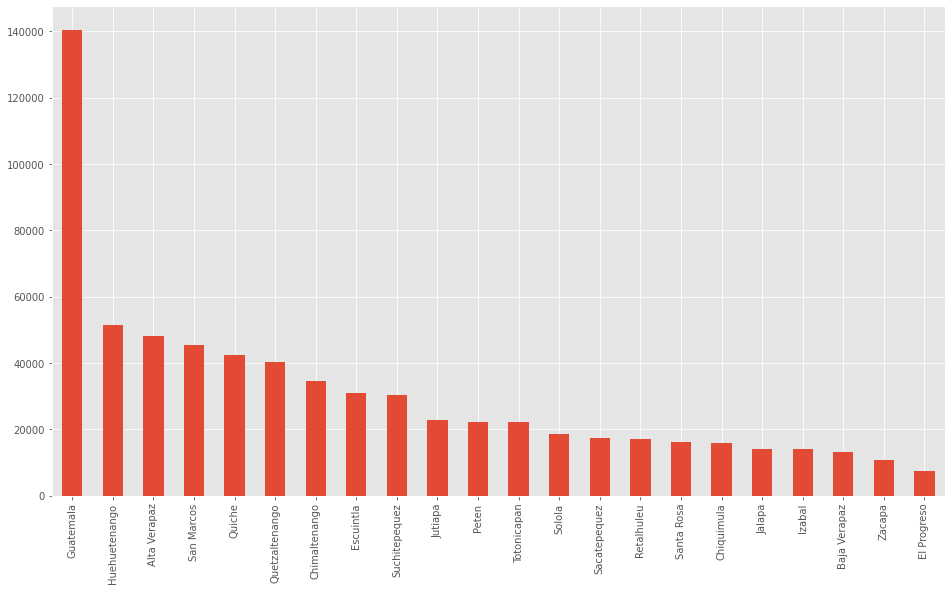

In [22]:
# cantidad de matrimonios segun el departamento

print(marriage_data['DEPREG'].value_counts().sort_values(ascending=False))
marriage_data['DEPREG'].value_counts().plot(kind='bar')

##### Aqui podemos observar que el departamento que tiene una diferencia bastante notable a comparacion de los demas departamentos es Guatemala con 160745 matrimonios.

2019    75230
2014    73315
2018    73286
2015    71163
2012    70807
2017    69637
2013    67442
2016    66913
2011    61484
2010    47639
Name: AÑOOCU, dtype: int64


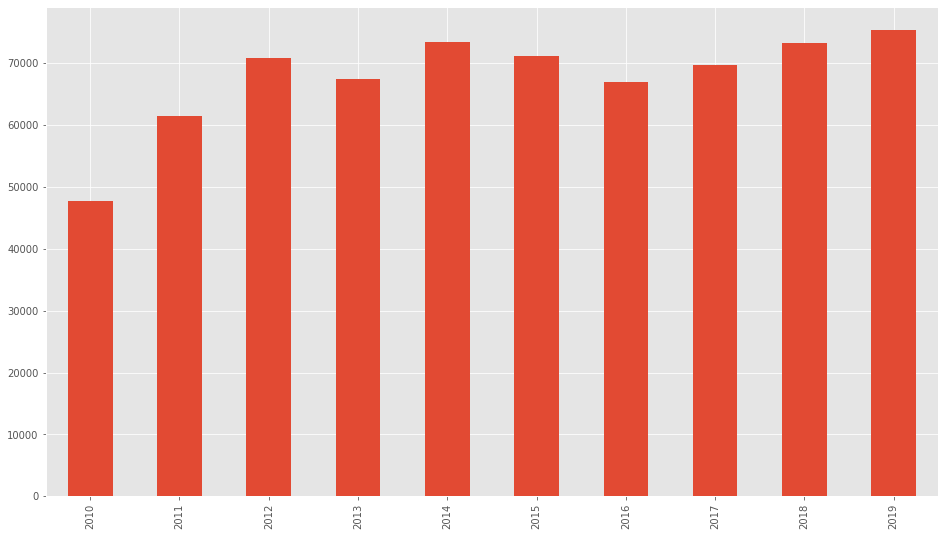

In [23]:
# cantidad de matrimonios por cada año

marriage_data['AÑOOCU'].value_counts().sort_index().plot(kind='bar')

print(marriage_data['AÑOOCU'].value_counts().sort_values(ascending=False))

### Cantidad de matrimonios por cada mes

12    69271
1     64124
5     60189
3     59918
11    58504
4     55160
2     54802
8     54484
10    52525
6     50110
7     49298
9     48531
Name: MESREG, dtype: int64


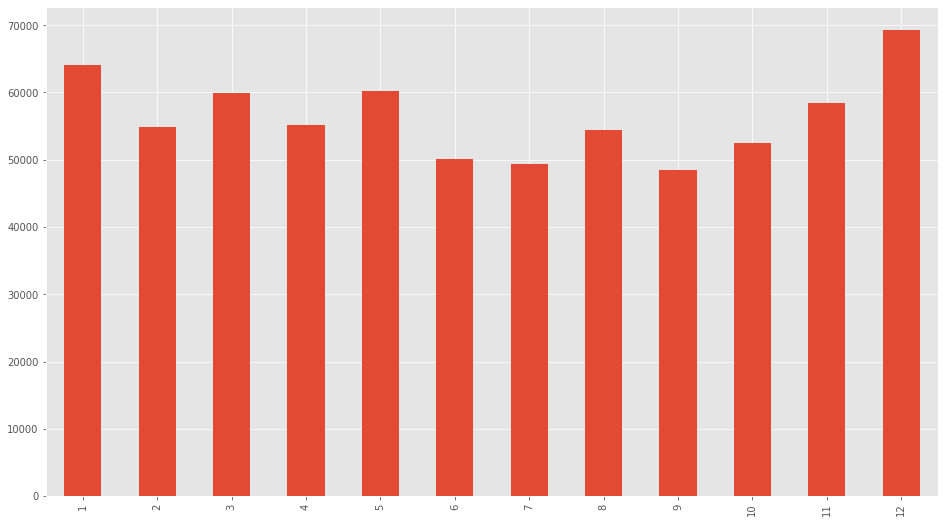

In [24]:


marriage_data['MESREG'].value_counts().sort_index().plot(kind='bar')

print(marriage_data['MESREG'].value_counts().sort_values(ascending=False))

##### Aqui podemos observar que los 3 años con mas matrimonios fueron 2013, 2015, 2011.

##### El mes que tuvo mas matrimonios desde 2010 hasta 2020 es el mes de diciembre

### histograma de edad de los hombres

Asimetria: 1.980375699482132
Curtosis: 4.3808529186610725


<AxesSubplot:>

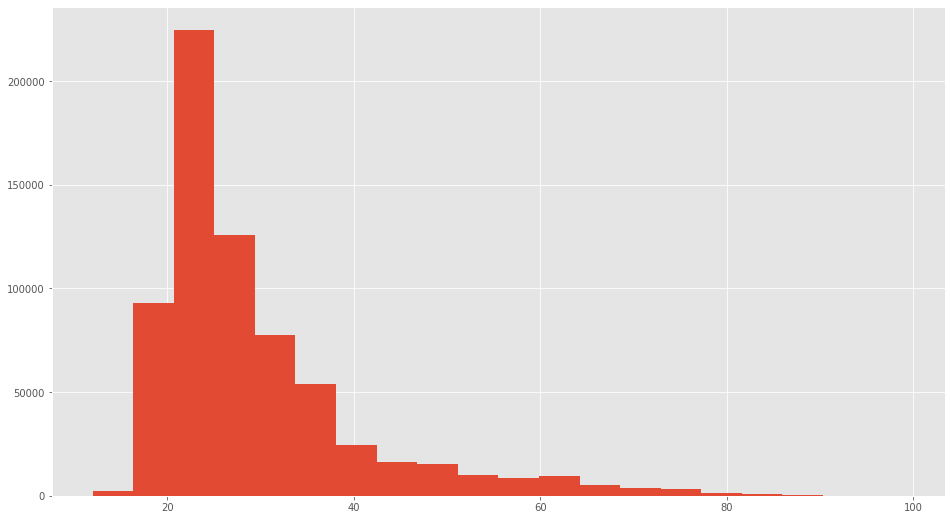

In [25]:


print('Asimetria:', marriage_data['EDADHOM'].skew())
print('Curtosis:', marriage_data['EDADHOM'].kurt())
marriage_data['EDADHOM'].hist(bins=20)


<AxesSubplot:>

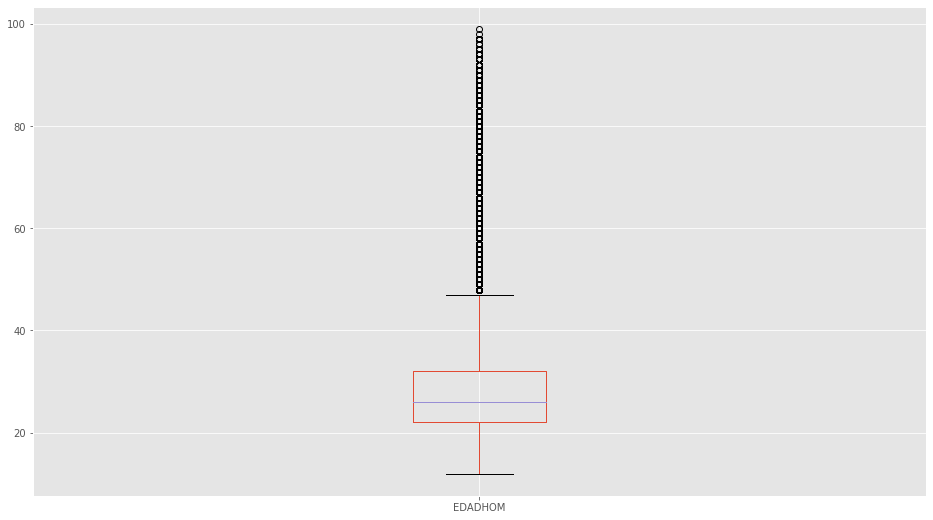

In [26]:

marriage_data.boxplot(column=['EDADHOM'])


Asimetria: 2.0527960237385643
Curtosis: 5.130374908823027


<AxesSubplot:>

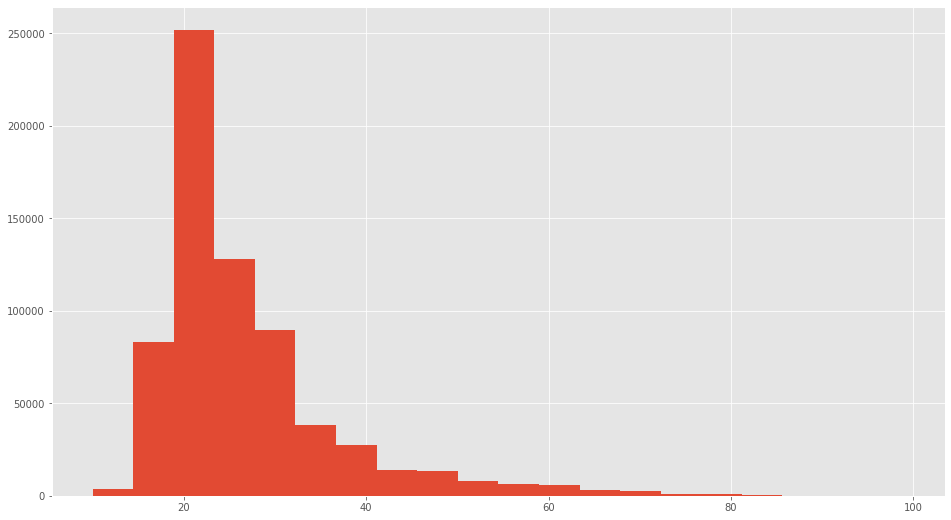

In [27]:
# Histograma de edad de las mujeres

print('Asimetria:', marriage_data['EDADMUJ'].skew())
print('Curtosis:', marriage_data['EDADMUJ'].kurt())
marriage_data['EDADMUJ'].hist(bins=20)

#### Se puede observar que ambas distribuciones son normales leptocurticas y con coeficiente de asimetría positivo alto indicando que estan ambos sesgados a la derecha

<AxesSubplot:>

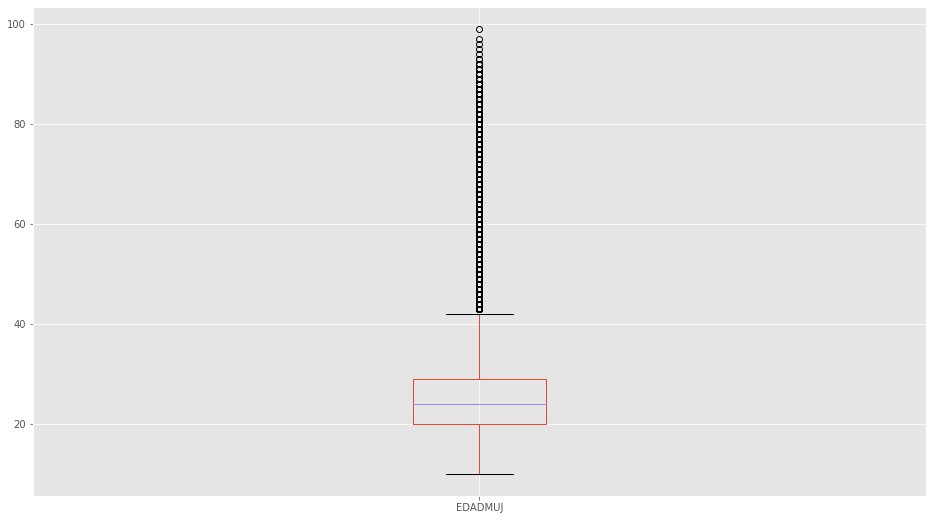

In [28]:
marriage_data.boxplot(column=['EDADMUJ'])

## Matrices de correlación

In [29]:
#Diaocu, mesocu, edad de hombre, edad de mujer, mesreg

dfNumData = marriage_data[['MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG', 'ESCMUJINT', 'ESCHOMINT']].apply(pd.to_numeric)
dfNumData2 = marriage_data[['MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG', 'ESCMUJINT', 'ESCHOMINT']].apply(pd.to_numeric).head(76710)
numData2 = np.array(dfNumData2)
numData = np.array(dfNumData)
numData




array([[12, 28, 20, 12,  1,  1],
       [ 2, 45, 41,  5,  0,  0],
       [12, 35, 27, 12,  0,  1],
       ...,
       [11, 22, 19, 11,  1,  3],
       [10, 28, 19, 10,  2,  4],
       [12, 44, 39, 12,  3,  4]])

## Matrices de correlación

#### Usando Pearson

<AxesSubplot:>

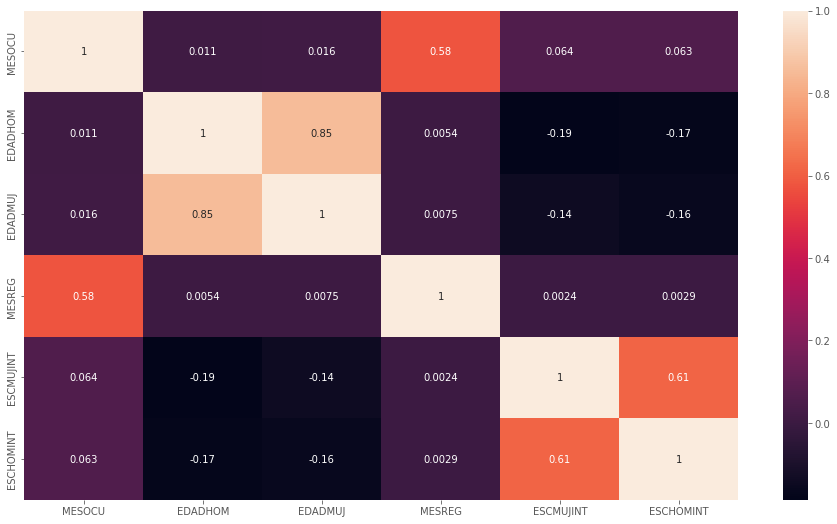

In [30]:
sb.heatmap(dfNumData.corr(), xticklabels=dfNumData.corr().columns, yticklabels=dfNumData.corr().columns, annot=True)

#### Usando Spearman

<AxesSubplot:>

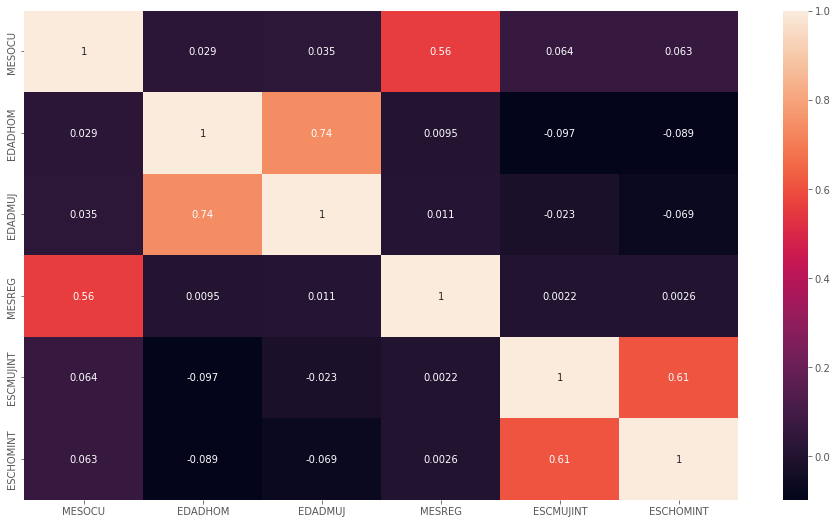

In [31]:
sb.heatmap(dfNumData.corr(method='spearman'), xticklabels=dfNumData.corr().columns, yticklabels=dfNumData.corr().columns, annot=True)

#### Algo interesante que podemos destacar es que la escolaridad de la mujer y del hombre parece tener una correlación, además parece ser que mediante pearson exista una pequeña tendencia a una correlación negativa entre la edad de matrimonio y el grado de escolaridad por lo que parece ser algo bueno para variables predictoras.

## Edad de matrimonio de las personas

#### Hombres

<AxesSubplot:>

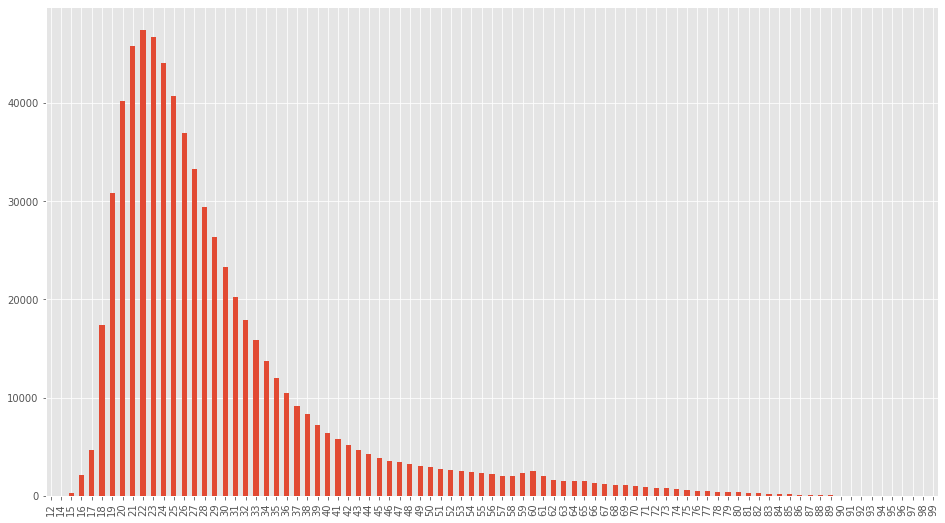

In [44]:
marriage_data['EDADHOM'].value_counts().sort_index().plot(kind='bar')


In [50]:
print('Media matrimonio Hombre', marriage_data['EDADHOM'].mean())
print('Moda matrimonio Hombre', marriage_data['EDADHOM'].mode())

Media matrimonio Hombre 29.472871080015835
Moda matrimonio Hombre 0    22
Name: EDADHOM, dtype: int32


#### Mujeres

<AxesSubplot:>

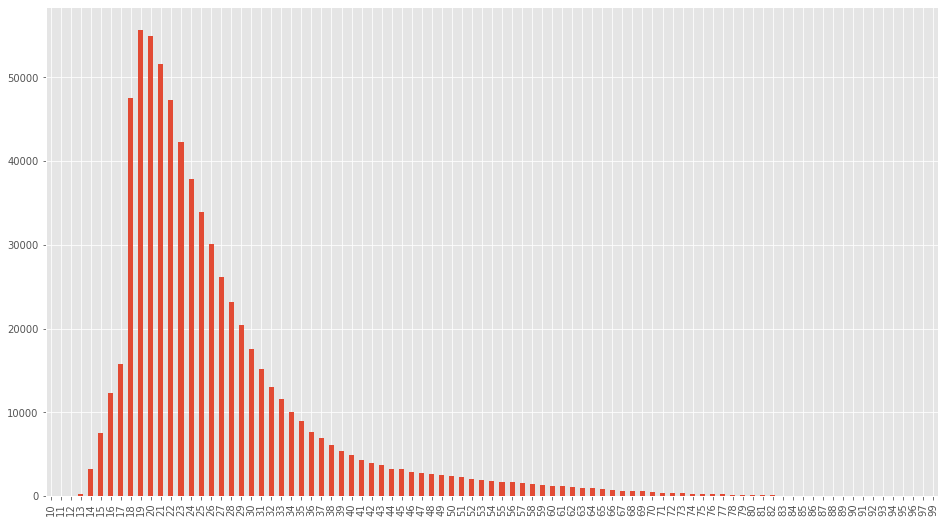

In [49]:
marriage_data['EDADMUJ'].value_counts().sort_index().plot(kind='bar')


In [51]:
print('Media matrimonio Mujeres', marriage_data['EDADMUJ'].mean())
print('Moda matrimonio Mujeres', marriage_data['EDADMUJ'].mode())

Media matrimonio Mujeres 26.509677714812472
Moda matrimonio Mujeres 0    19
Name: EDADMUJ, dtype: int32


## Densidad del valor absoluto de la diferencia de edad.

In [37]:
marriage_data['EDADDIF'] = marriage_data['EDADHOM'].sub(marriage_data['EDADMUJ']).abs()


C:\Users\josej\AppData\Local\Temp\ipykernel_13836\2500955729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marriage_data['EDADDIF'] = marriage_data['EDADHOM'].sub(marriage_data['EDADMUJ']).abs()


<AxesSubplot:ylabel='Density'>

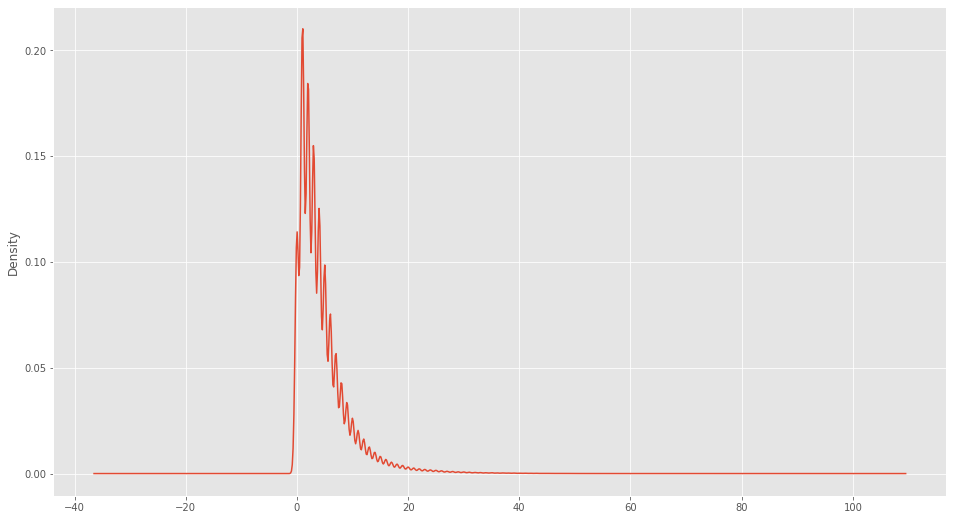

In [38]:
marriage_data['EDADDIF'].plot(kind='density')


<AxesSubplot:>

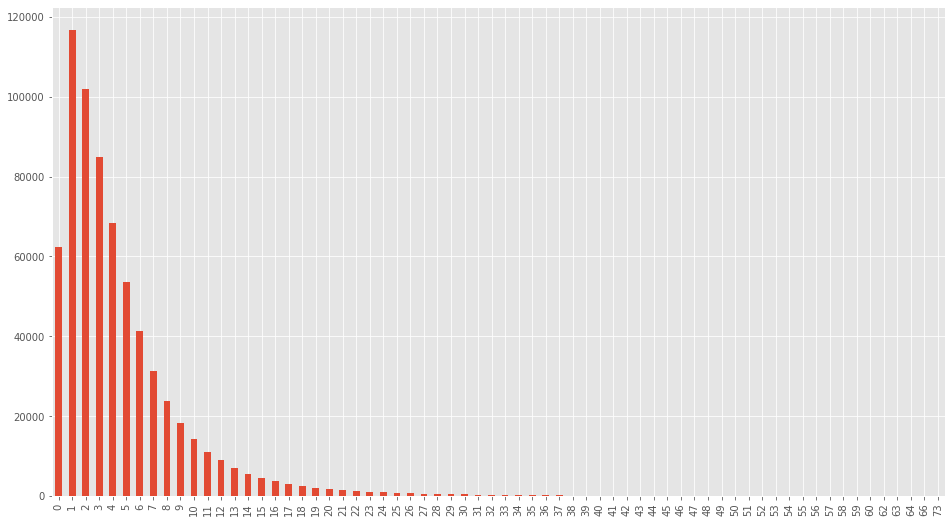

In [39]:
marriage_data['EDADDIF'].value_counts().sort_index().plot(kind='bar')

Asimetria: 2.736381059440005
Curtosis: 12.256656644698323


<AxesSubplot:>

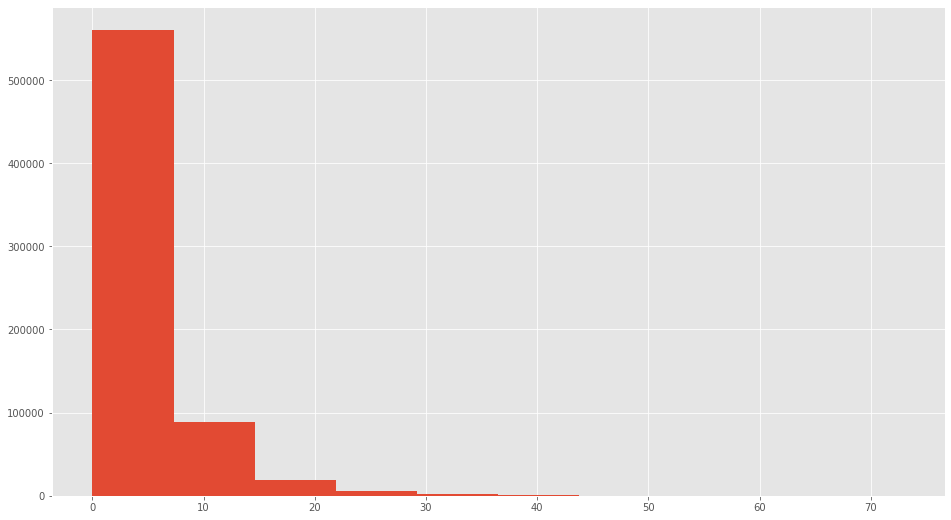

In [40]:

print('Asimetria:', marriage_data['EDADDIF'].skew())
print('Curtosis:', marriage_data['EDADDIF'].kurt())
marriage_data['EDADDIF'].hist()

##### Podemos observar en estas representaciones graficas de la diferencia de edad entre hombre y mujeres que estas se encuentran entre 0 años de diferencia hasta 20 años. Además que la diferencia de edad más comun es de 1 años entre las parejas.

## Para mujeres y hombres con escolaridad nula

In [54]:
print('Hombres y mujeres con escolaridad nula',marriage_data[(marriage_data['ESCMUJINT'] == 0) & (marriage_data['ESCHOMINT'] == 0)]['ESCHOM'].count())
print('Hombres o mujeres con escolaridad nula',marriage_data[(marriage_data['ESCMUJINT'] == 0) | (marriage_data['ESCHOMINT'] == 0)]['ESCHOM'].count())


Hombres y mujeres con escolaridad nula 72441
Hombres o mujeres con escolaridad nula 207014


### Edad hombre escolaridad nula

<AxesSubplot:>

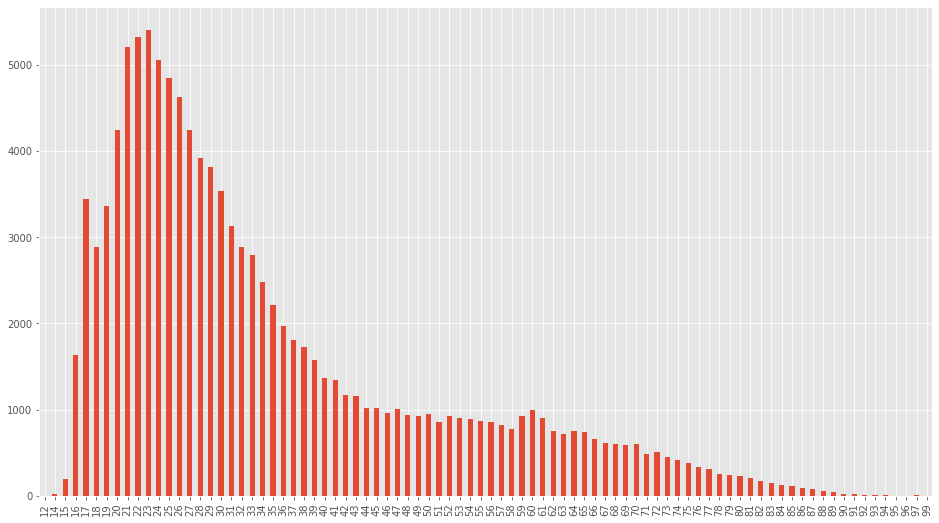

In [55]:
marriage_data[(marriage_data['ESCHOMINT'] == 0)]['EDADHOM'].value_counts().sort_index().plot(kind='bar')

In [60]:
print('Media matrimonio Hombres escolaridad nula', marriage_data[(marriage_data['ESCHOMINT'] == 0)]['EDADHOM'].mean())
print('Moda matrimonio Hombres escolaridad nula', marriage_data[(marriage_data['ESCHOMINT'] == 0)]['EDADHOM'].mode())

Media matrimonio Hombres escolaridad nula 34.80950431935349
Moda matrimonio Hombres escolaridad nula 0    23
Name: EDADHOM, dtype: int32


### Edad mujeres escolaridad nula

<AxesSubplot:>

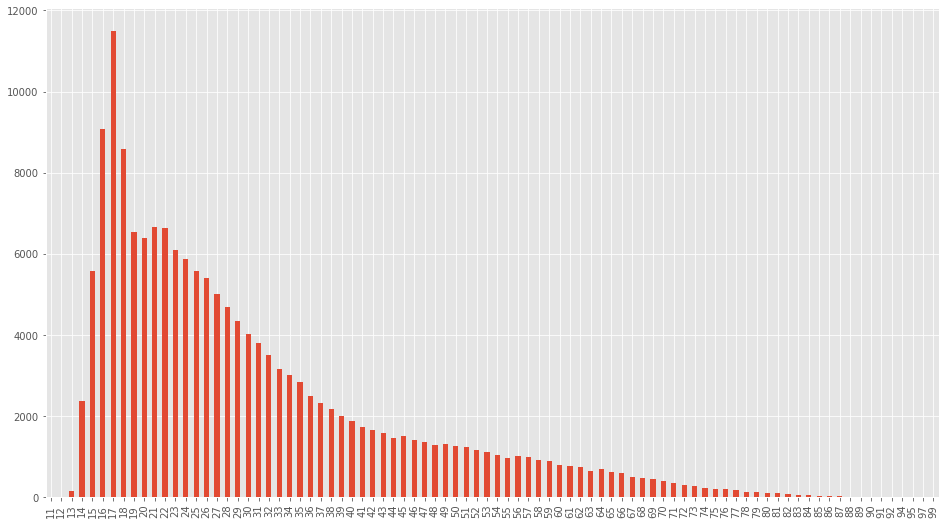

In [63]:
marriage_data[(marriage_data['ESCMUJINT'] == 0)]['EDADMUJ'].value_counts().sort_index().plot(kind='bar')


In [65]:
print('Media matrimonio Mujeres escolaridad nula', marriage_data[(marriage_data['ESCMUJINT'] == 0)]['EDADMUJ'].mean())
print('Moda matrimonio Mujeres escolaridad nula', marriage_data[(marriage_data['ESCMUJINT'] == 0)]['EDADMUJ'].mode())
print('Mediana matrimonio Mujeres escolaridad nula', marriage_data[(marriage_data['ESCMUJINT'] == 0)]['EDADMUJ'].median())

Media matrimonio Mujeres escolaridad nula 30.095582026812778
Moda matrimonio Mujeres escolaridad nula 0    17
Name: EDADMUJ, dtype: int32
Mediana matrimonio Mujeres escolaridad nula 26.0


#### Diferencia de edad

<AxesSubplot:>

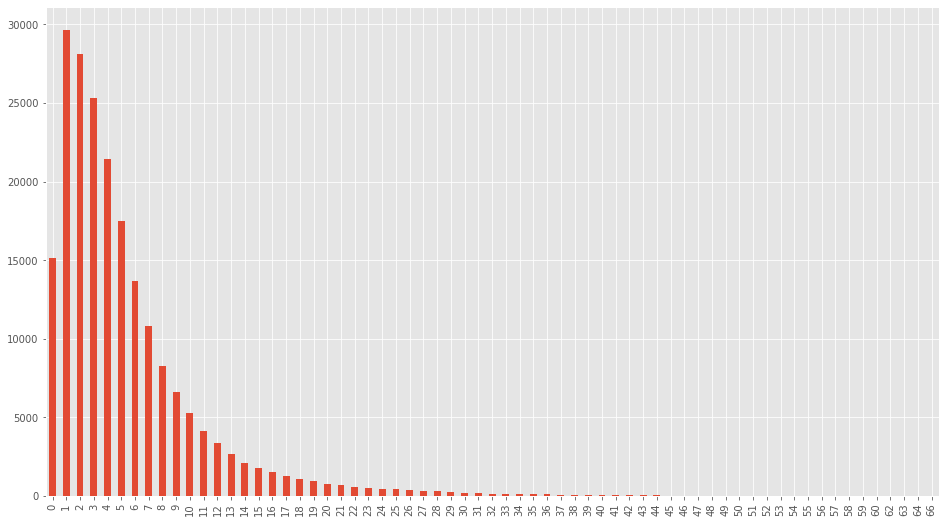

In [58]:
marriage_data[(marriage_data['ESCMUJINT'] == 0) | (marriage_data['ESCHOMINT'] == 0)]['EDADDIF'].value_counts().sort_index().plot(kind='bar')

#### Basado en los datos de las personas que deseamos estudiar nos queda que las mujeres y hombres que se casan con ninguna escolaridad aumentan su promedio de edad, también en el hombre aumenta la moda por 1 año. Sin embargo la moda para las mujeres sin escolaridad es de 17 años, 2 años menos que en los datos generales, diciéndonos así que si las mujeres no tienen escolaridad, tiende a haber un alto porcentaje de ellas que se casarán siendo menores de edad

### Meses en los que se casan las personas con escolaridad nula

<AxesSubplot:>

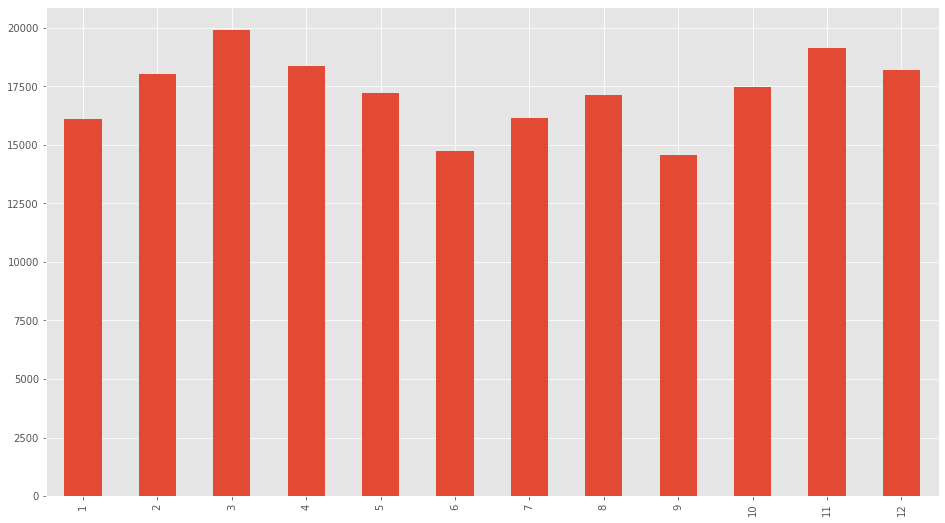

In [66]:
marriage_data[(marriage_data['ESCMUJINT'] == 0) | (marriage_data['ESCHOMINT'] == 0)]['MESOCU'].value_counts().sort_index().plot(kind='bar')

In [67]:
print('Moda mes matrimonios sin escolaridad', marriage_data[(marriage_data['ESCMUJINT'] == 0) | (marriage_data['ESCHOMINT'] == 0)]['MESOCU'].mode())


Moda mes matrimonios sin escolaridad 0    3
Name: MESOCU, dtype: int32


#### Vemos que el mes con mayor ocurrencia de matrimonios con algun miembro sin escolaridad es marzo, por lo que sería bueno lanzar campañas antes de este mes o en 2 meses siguientes o anteriores a este ya que aquí también se concentra una alta cantidad de datos. Además noviembre es el segundo mes que tiene más matrimonios con algun miembro sin escolaridad, por lo que convendría hacer una campaña de prevención de matrimonio en este mes o en el mes anterior o siguiente a este.

## Clustering

In [36]:
variables = marriage_data[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']]

numData = np.array(variables.sample(frac=0.1, random_state=123).reset_index(drop=True))


In [37]:
numData_scaled = sklearn.preprocessing.scale(numData) #Modificar numData
pyclustertend.hopkins(numData, len(numData))

0.07736993984400185

#### Podemos ver que el valor no es cercano a 1/2 por lo que si vale la pena realizar clustering

In [38]:

# normalizar datos
variables_norm = (variables - variables.min()) / (variables.max() - variables.min())
variables_norm

,MESOCU,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT
1,1.000000,0.183908,0.112360,0.2,0.2
3,0.090909,0.379310,0.348315,0.0,0.0
4,1.000000,0.264368,0.191011,0.2,0.0
5,0.090909,0.218391,0.280899,0.0,0.0
7,0.545455,0.252874,0.280899,0.0,0.0
...,...,...,...,...,...
76905,0.818182,0.160920,0.179775,0.6,0.6
76907,0.818182,0.195402,0.101124,0.6,0.4
76917,0.909091,0.114943,0.101124,0.6,0.2
76921,0.818182,0.183908,0.101124,0.8,0.4


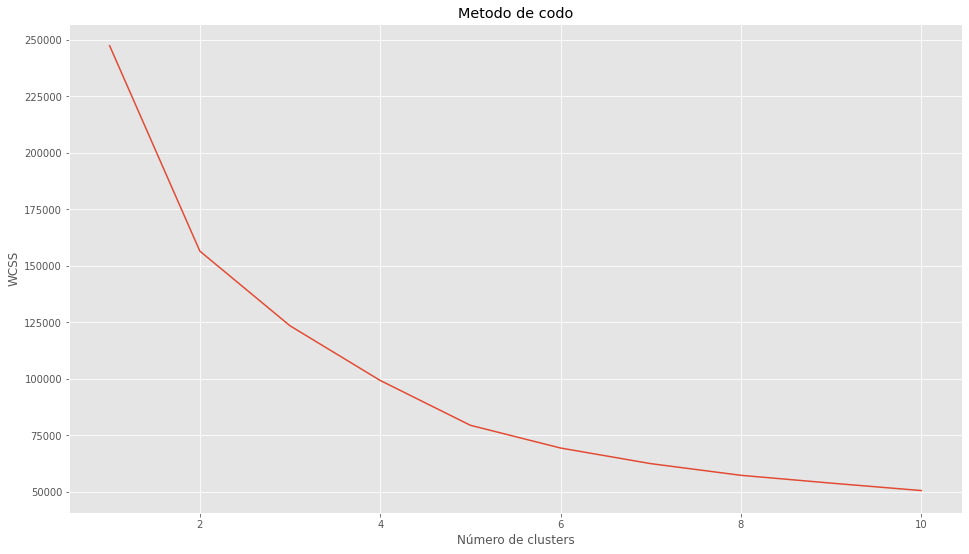

In [27]:
variables = marriage_data[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']]

# normalizar datos
variables_norm = (variables - variables.min()) / (variables.max() - variables.min())
variables_norm

#busqueda de la cantidad optima de clusters con el metodo de codo
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter=300)
    kmeans.fit(variables_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo de codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()


#### Con el gráfico del método del codo, podemos decir que el punto de deflexión adecuado para decidir cobre el número de clusters es el 2, debido al cambio de pendiente mayot antes de la tendencia a la estabilización de la tangente sobre la gráfica.

In [20]:
# Creando muestra aleatoria del 10% de los datos
dfNumData = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']].apply(pd.to_numeric)
dfNumData = dfNumData.sample(frac=0.1).reset_index(drop=True)
numData = np.array(dfNumData)

Para:  2 Clusters  La cantidad promedio de la silueta es : 0.5304795739875294
Para:  3 Clusters  La cantidad promedio de la silueta es : 0.3070473419813024
Para:  4 Clusters  La cantidad promedio de la silueta es : 0.30873940536523076
Para:  5 Clusters  La cantidad promedio de la silueta es : 0.27453367407342955
Para:  6 Clusters  La cantidad promedio de la silueta es : 0.2548731839200873


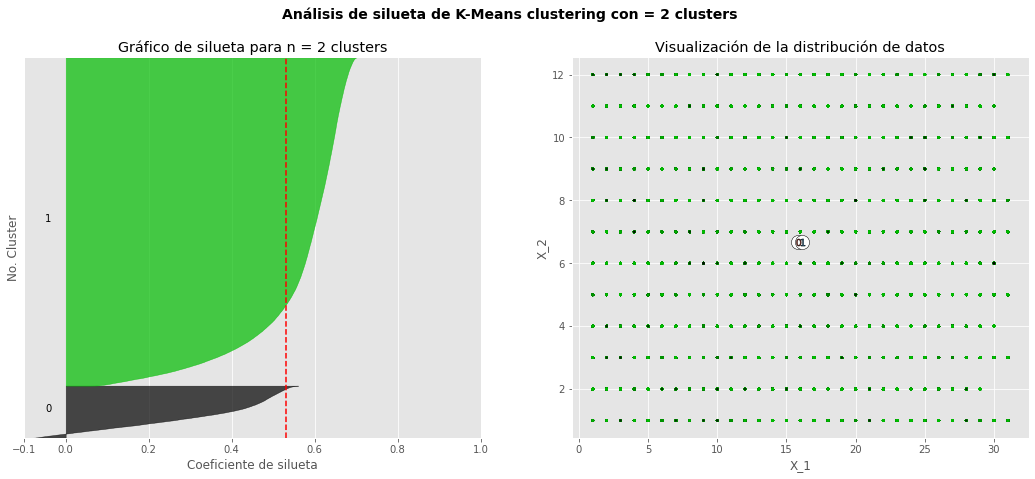

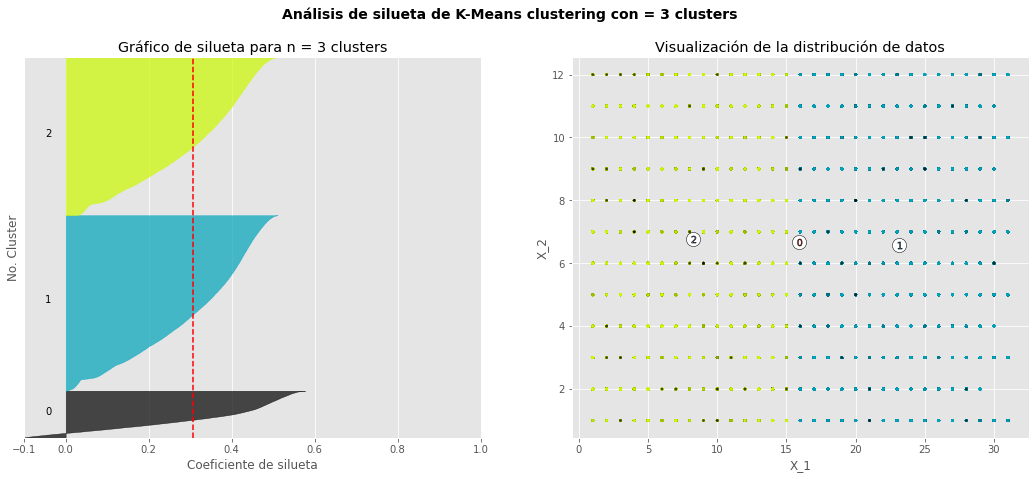

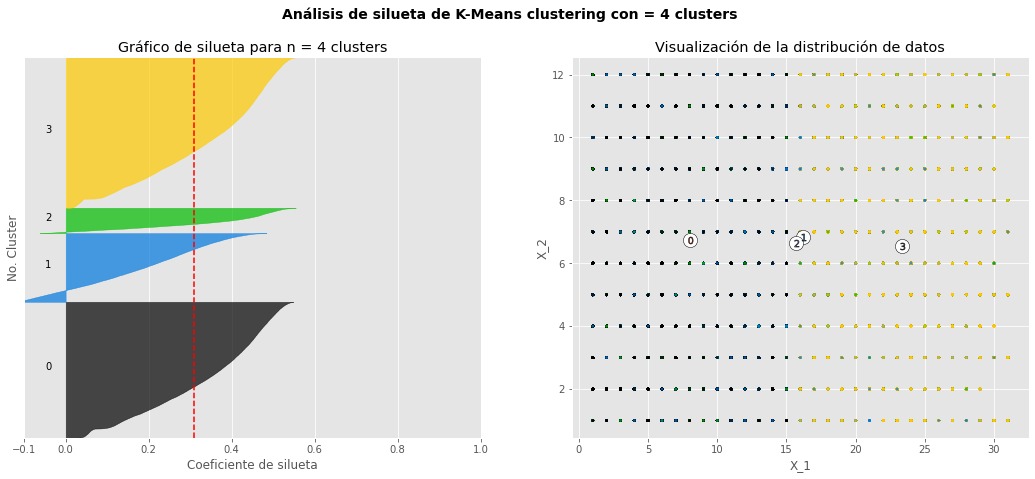

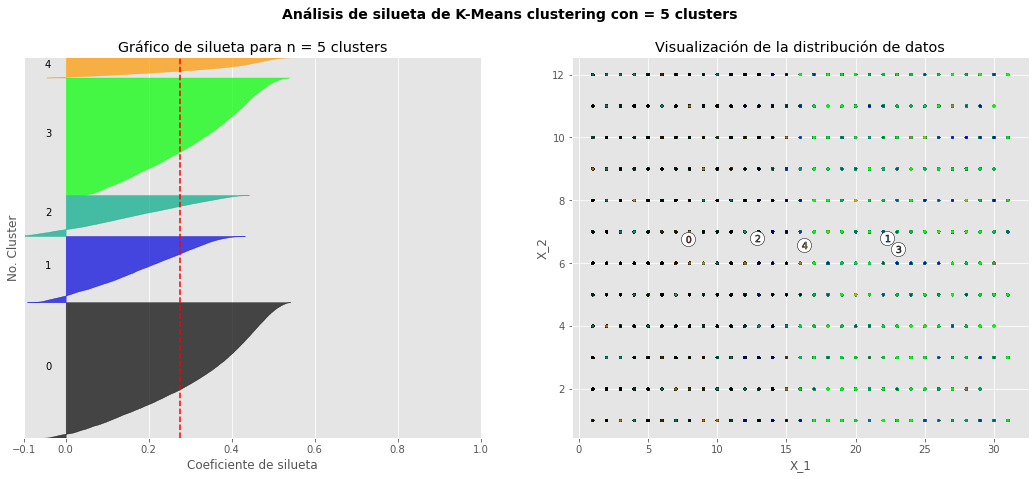

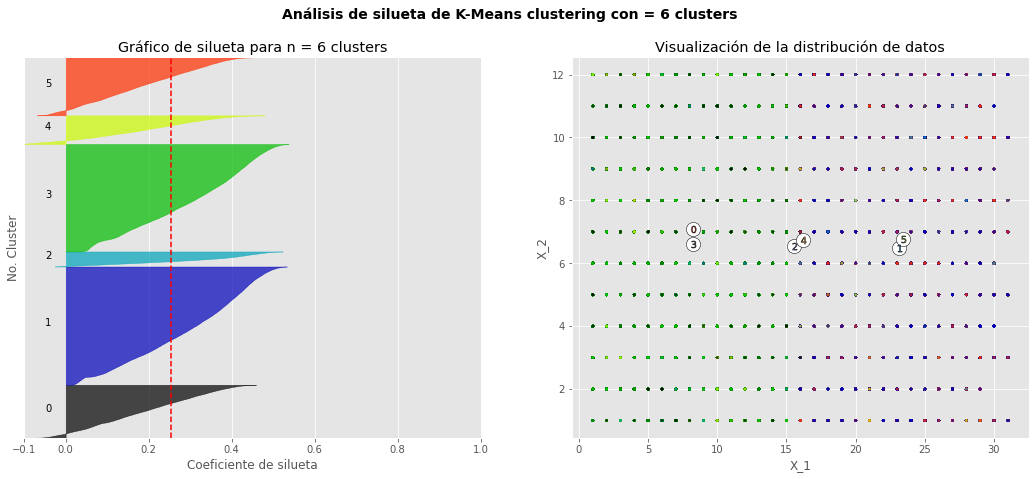

In [29]:
# Basado en el ejemplo de calculo de silueta visto en clase

range_n_clusters = [2, 3, 4, 5, 6]

# Loop sobre los distintos valores de n_clusters
for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(numData) + (n_clusters + 1) * 10])

    # El (n_clusters+1)*10 es para el espacio en blanco entre las siluetas
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(numData)

    # El silhouette_score calcula la calidad de agrupamiento promedio de la silueta
    silhouette_avg = silhouette_score(numData, cluster_labels)
    print(
        "Para: ",
        n_clusters,
        "Clusters  La cantidad promedio de la silueta es :",
        silhouette_avg,
    )

    # El silhouette_samples calcula la calidad de agrupamiento de cada punto
    sample_silhouette_values = silhouette_samples(numData, cluster_labels)

    y_lower = 10

    # Loop sobre los grupos
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        # El primer valor es el más bajo
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Color de la silueta
        color = cm.nipy_spectral(float(i) / n_clusters)

        # Dibuja la silueta
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Dibuja el nombre del grupo
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        
        y_lower = y_upper + 10

    ax1.set_title("Gráfico de silueta para n = {} clusters".format(n_clusters))
    ax1.set_xlabel("Coeficiente de silueta")
    ax1.set_ylabel("No. Cluster")


    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1]) 

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        numData[:, 0], numData[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Dibuja el centroide de cada grupo
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    for i, c in enumerate(centers):

        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")



    ax2.set_title("Visualización de la distribución de datos")
    ax2.set_xlabel("X_1")
    ax2.set_ylabel("X_2")

    plt.suptitle(
        "Análisis de silueta de K-Means clustering con = %d clusters"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Como podemos observar, se obtiene un buen resultado promedio de coeficiente de silueta para 2 clusters de 0.53. Además, por lo observado en la gráfica de codo, podemos decir que es adecuado realizar el agrupamiento con 2 clusters.

## Probando 3 algoritmos para el agrupamiento

#### K-means

In [39]:
variables = marriage_data[['DIAOCU', 'MESOCU', 'EDADHOM', 'EDADMUJ', 'MESREG']]
variables = variables.sample(frac=0.01, random_state=123).reset_index(drop=True)
# normalizar datos
variables_norm = (variables - variables.min()) / (variables.max() - variables.min())
variables_norm

,DIAOCU,MESOCU,EDADHOM,EDADMUJ,MESREG
0,0.433333,1.000000,0.064103,0.076923,1.000000
1,0.166667,1.000000,0.153846,0.064103,1.000000
2,0.966667,0.181818,0.217949,0.205128,0.272727
3,0.433333,0.181818,0.423077,0.423077,0.181818
4,0.966667,0.909091,0.128205,0.282051,1.000000
...,...,...,...,...,...
6764,0.433333,0.818182,0.089744,0.089744,0.818182
6765,0.666667,0.636364,0.410256,0.141026,0.636364
6766,0.433333,0.636364,0.141026,0.102564,0.636364
6767,0.166667,0.090909,0.076923,0.115385,0.272727


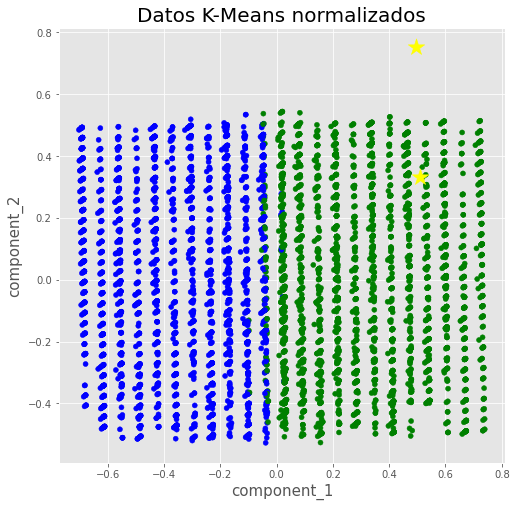

In [40]:
# Aplicando el metodo de k-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(variables_norm)


#normalize the centroids
centroids = kmeans.cluster_centers_
centroids_norm = (centroids - centroids.min()) / (centroids.max() - centroids.min())
centroids_norm



pca = PCA(n_components=2)
pca_data = pca.fit_transform(variables_norm)
pca_data_df = pd.DataFrame(data=pca_data, columns=['component_1', 'component_2'])

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('component_1', fontsize=15)
ax.set_ylabel('component_2', fontsize=15)
ax.set_title('Datos K-Means normalizados', fontsize=20)

color_theme = np.array(['blue', 'green', 'orange'])
ax.scatter(pca_data_df['component_1'], pca_data_df['component_2'], c=color_theme[kmeans.labels_], s=25)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c="yellow", marker="*")
plt.show()

In [41]:
# Creando muestra aleatoria mas pequena del 5% de los datos
dfNumData2 = marriage_data[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']].apply(pd.to_numeric)
dfNumData2 = dfNumData2.sample(frac=0.01).reset_index(drop=True)
numData2 = np.array(dfNumData2)
dfNumData2

,MESOCU,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT
0,6,26,23,4,3
1,9,22,16,0,0
2,3,37,30,1,0
3,1,25,26,1,0
4,11,35,29,0,0
...,...,...,...,...,...
6764,11,26,27,1,0
6765,9,33,39,1,2
6766,2,31,27,0,0
6767,10,23,18,0,0


#### Clustering Jerarquico

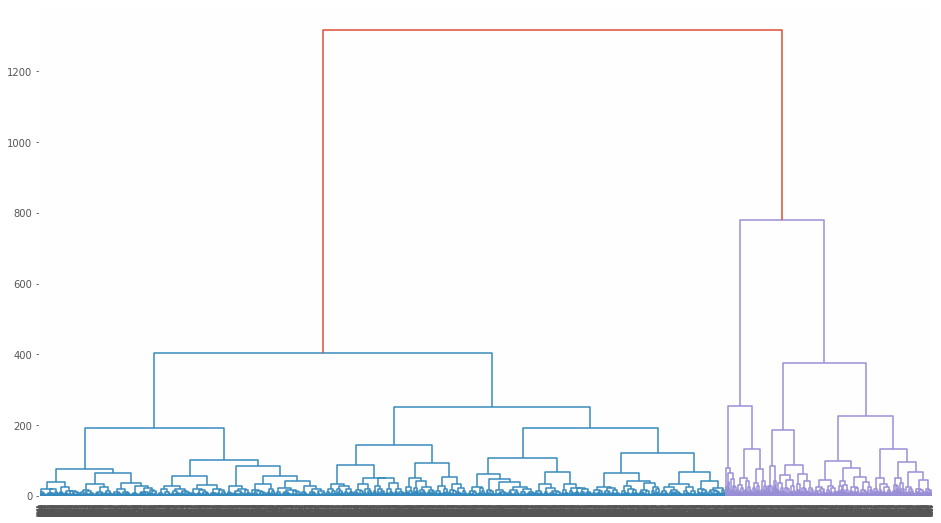

In [42]:
dendograma = sch.dendrogram(sch.linkage(numData2, method='ward'))

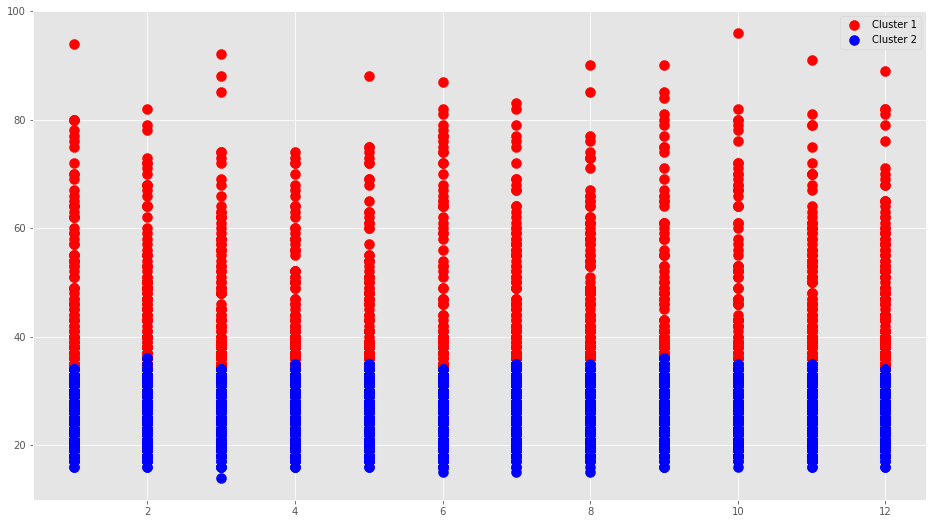

In [44]:
hc = cluster.AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
labelHc = hc.fit_predict(numData2)

plt.scatter(numData2[labelHc == 0, 0], numData2[labelHc == 0, 1],s=100,c='red', label = "Cluster 1")
plt.scatter(numData2[labelHc == 1, 0], numData2[labelHc == 1, 1],s=100,c='blue', label = "Cluster 2")
plt.legend()

#### Mixture of Gaussians

In [45]:
variables = marriage_data[[ 'MESOCU', 'EDADHOM', 'EDADMUJ', 'ESCHOMINT', 'ESCMUJINT']]
variables = variables.sample(frac=0.01).reset_index(drop=True)
# normalizar datos
variables_norm = (variables - variables.min()) / (variables.max() - variables.min())
variables_norm

,MESOCU,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT
0,0.363636,0.294872,0.164384,0.2,0.6
1,0.000000,0.435897,0.383562,0.6,0.2
2,1.000000,0.166667,0.178082,0.8,0.4
3,0.000000,0.141026,0.109589,0.4,0.2
4,0.454545,0.089744,0.136986,0.0,0.4
...,...,...,...,...,...
6764,0.545455,0.076923,0.095890,0.6,0.6
6765,1.000000,0.256410,0.164384,0.2,0.6
6766,0.545455,0.307692,0.287671,0.4,0.4
6767,0.636364,0.320513,0.273973,0.6,0.2


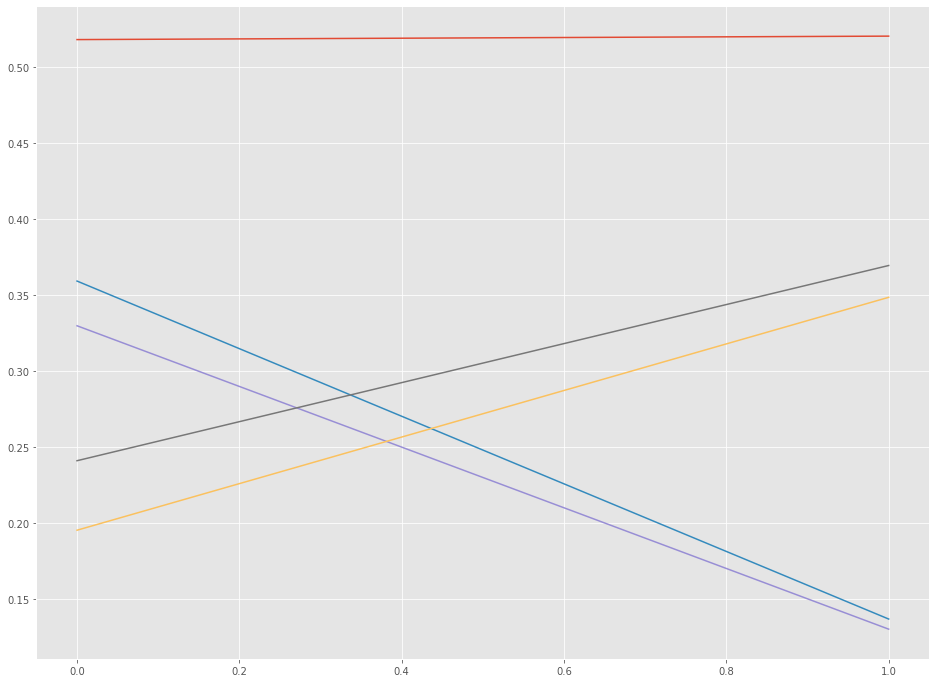

In [46]:
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(variables_norm)

plt.figure(figsize=(16, 12))
plt.plot(gmm.means_)

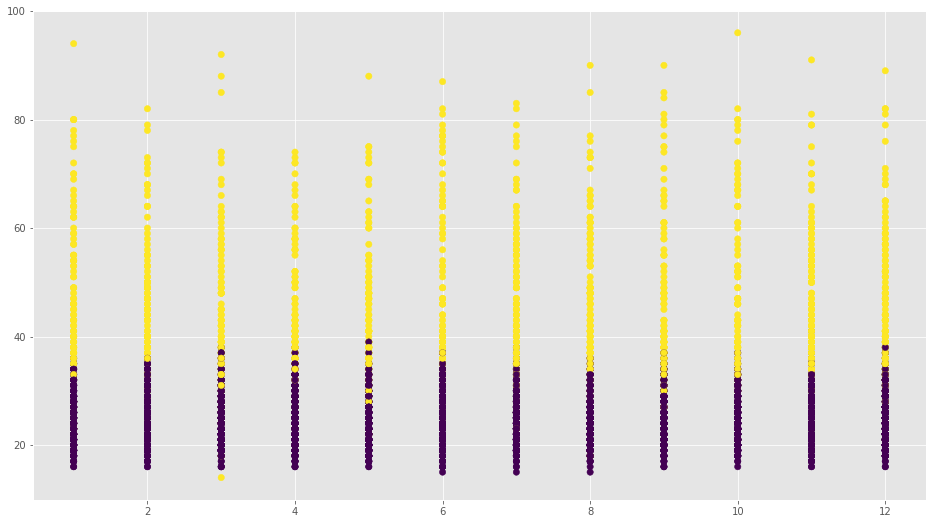

In [47]:
gmm = mixture.GaussianMixture(n_components = 2).fit(numData2)
labelsGauss = gmm.predict(numData2)
#labels
plt.scatter(numData2[:, 0], numData2[:, 1], c=labelsGauss, s=40,cmap="viridis")

### Evaluar la calidad hecha por cada agrupamiento mediante el metodo de la silueta

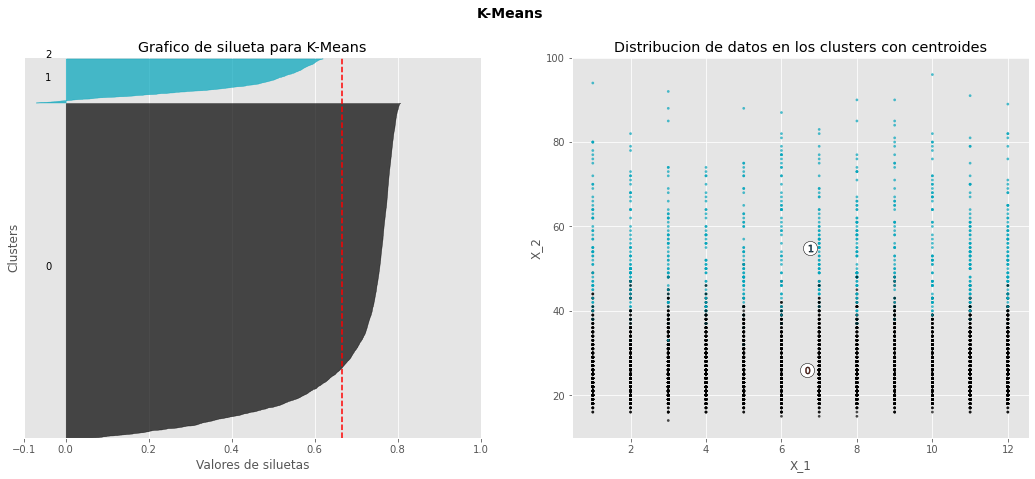

In [48]:
numData = numData2
# Basado en el ejemplo visto en clase
clusterer = KMeans(n_clusters=2, random_state=10)
cluster_labels = clusterer.fit_predict(numData)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(numData) + (3 + 1) * 10])
sample_silhouette_values = silhouette_samples(numData, cluster_labels)
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Grafico de silueta para K-Means")
ax1.set_xlabel("Valores de siluetas")
ax1.set_ylabel("Clusters")
ax1.axvline(x=silhouette_score(numData, cluster_labels), color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax2.scatter(numData[:, 0], numData[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

centers = clusterer.cluster_centers_
ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Distribucion de datos en los clusters con centroides")
ax2.set_xlabel("X_1")
ax2.set_ylabel("X_2")

plt.suptitle(
        "K-Means",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

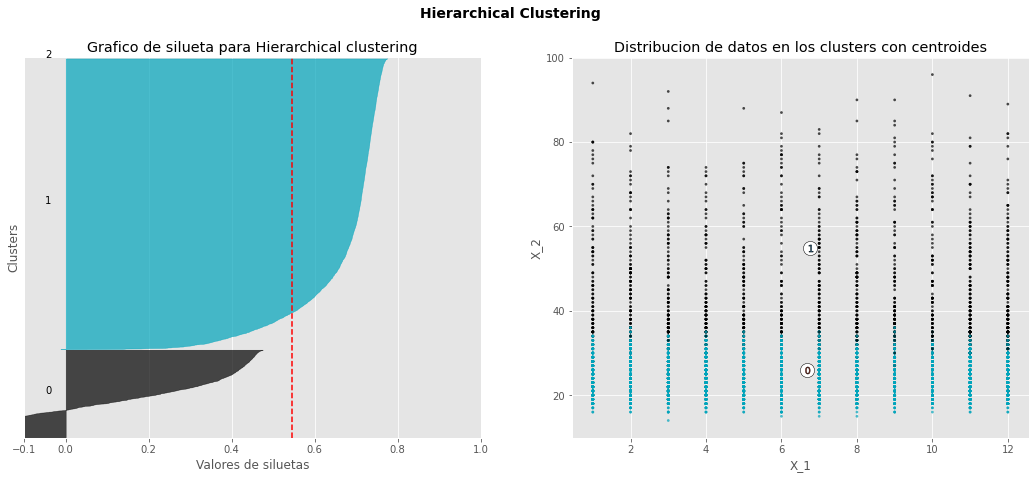

In [49]:
# Basado en el ejemplo visto en clase
cluster_labels = labelHc


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(numData) + (3 + 1) * 10])
sample_silhouette_values = silhouette_samples(numData, cluster_labels)
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Grafico de silueta para Hierarchical clustering")
ax1.set_xlabel("Valores de siluetas")
ax1.set_ylabel("Clusters")
ax1.axvline(x=silhouette_score(numData, labelHc), color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax2.scatter(numData[:, 0], numData[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

centers = clusterer.cluster_centers_
ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Distribucion de datos en los clusters con centroides")
ax2.set_xlabel("X_1")
ax2.set_ylabel("X_2")

plt.suptitle(
        "Hierarchical Clustering",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

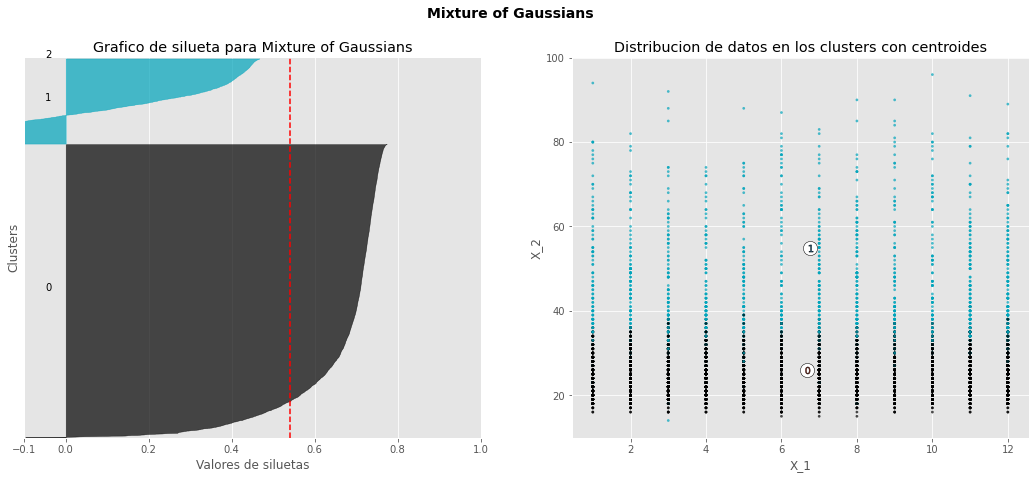

In [50]:
# Basado en el ejemplo visto en clase
cluster_labels = labelsGauss

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(numData) + (3 + 1) * 10])
sample_silhouette_values = silhouette_samples(numData, cluster_labels)
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  

ax1.set_title("Grafico de silueta para Mixture of Gaussians")
ax1.set_xlabel("Valores de siluetas")
ax1.set_ylabel("Clusters")
ax1.axvline(x=silhouette_score(numData, labelsGauss), color="red", linestyle="--")

ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / 3)
ax2.scatter(numData[:, 0], numData[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k")

centers = clusterer.cluster_centers_
ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("Distribucion de datos en los clusters con centroides")
ax2.set_xlabel("X_1")
ax2.set_ylabel("X_2")

plt.suptitle(
        "Mixture of Gaussians",
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [51]:
print("Para K-means la silueta promedio es:", silhouette_score(numData, cluster_labels))
print("Para Hierarchical la silueta promedio es:", silhouette_score(numData, labelHc))
print("Para Mixture of Gaussians la silueta promedio es:", silhouette_score(numData, labelsGauss))


Para K-means la silueta promedio es: 0.5398888357219795
Para Hierarchical la silueta promedio es: 0.5446619563935426
Para Mixture of Gaussians la silueta promedio es: 0.5398888357219795


#### Basado en los gráficos de la silueta podemos observar que a el mejor gráfico de agrupamiento para los datos del gráfico de la silueta es el clustering jerarquico con un valor de 0.56 indicandonos una tendencia a un buen agrupamiento, este también tiene lógica que nos sirva ya que empieza con cada elemento como un grupo distinto y los va agrupando basados en distancias más cortas, lo cual nos conviene para el agrupamiento ya que así tendriamos a dar una tendencia de agrupar aquellos matrimonios atípicos

In [52]:
variables

,MESOCU,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT
0,5,37,25,1,3
1,1,48,41,3,1
2,12,27,26,4,2
3,1,25,21,2,1
4,6,21,23,0,2
...,...,...,...,...,...
6764,7,20,20,3,3
6765,12,34,25,1,3
6766,7,38,34,2,2
6767,8,39,33,3,1


In [53]:
variables['EDADDIF'] = variables['EDADHOM'].sub(variables['EDADMUJ']).abs()


In [54]:
#Unimos las columnas de los clusters al dataframe

hierarchical_cluster = pd.Series(labelHc)
variables['hierarchical'] = hierarchical_cluster

# No se toma en cuenta Gaussian, pero si se llegara a utilizar, sería de la siguiente forma
# gaussian_cluster = pd.Series(labelsGauss)
# summaryDf['gaussian'] = gaussian_cluster

# Clusters de cada tipo realizados al dataframe
variables.dropna()

,MESOCU,EDADHOM,EDADMUJ,ESCHOMINT,ESCMUJINT,EDADDIF,hierarchical
0,5,37,25,1,3,12,1
1,1,48,41,3,1,7,1
2,12,27,26,4,2,1,0
3,1,25,21,2,1,4,1
4,6,21,23,0,2,2,0
...,...,...,...,...,...,...,...
6764,7,20,20,3,3,0,1
6765,12,34,25,1,3,9,0
6766,7,38,34,2,2,4,1
6767,8,39,33,3,1,6,1


In [55]:
variables.groupby(['hierarchical','EDADHOM', 'EDADMUJ']).size()

hierarchical  EDADHOM  EDADMUJ
0             14       13         1
              16       14         1
                       16         1
                       17         1
                       18         2
                                 ..
1             87       49         1
                       72         1
              88       76         1
              89       84         1
              92       38         1
Length: 1568, dtype: int64

In [56]:
variables.groupby(['hierarchical'])['EDADDIF'].mean()

hierarchical
0    4.393746
1    4.595348
Name: EDADDIF, dtype: float64

In [57]:
variables.groupby(['hierarchical'])['EDADHOM', 'EDADMUJ'].mean()

C:\Users\josej\AppData\Local\Temp\ipykernel_22952\3277603626.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  variables.groupby(['hierarchical'])['EDADHOM', 'EDADMUJ'].mean()


,EDADHOM,EDADMUJ
hierarchical,,
0,29.262285,26.629866
1,29.568627,26.535755


In [58]:
variables.groupby(['hierarchical'])['hierarchical'].count()

hierarchical
0    1567
1    5202
Name: hierarchical, dtype: int64

#### Podemos observar que en el cluster 0 hay una menor cantidad de datos, indicandonos que este podría ser un tipo de cluster atípico. Sin embargo se debe hacer un análisis exploratorio para saber que nos está diciendo esta información

## Para el cluster 0

(array([[197., 709., 374., 122.,  64.,  42.,  29.,  19.,   5.,   6.],
        [456., 626., 264., 104.,  47.,  31.,  24.,   8.,   6.,   1.]]),
 array([13. , 20.5, 28. , 35.5, 43. , 50.5, 58. , 65.5, 73. , 80.5, 88. ]),
 <a list of 2 BarContainer objects>)

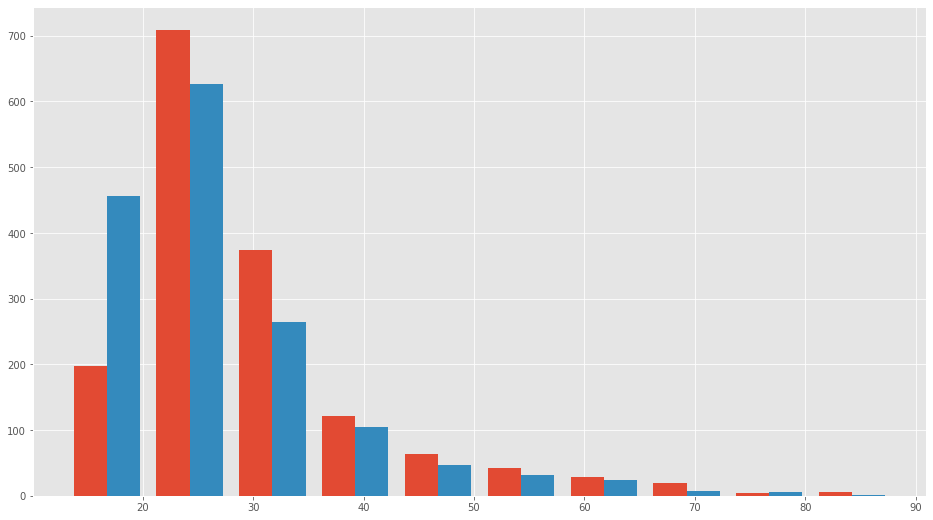

In [72]:

cluster_0 = variables[variables['hierarchical'] == 0]
plt.hist(cluster_0[['EDADHOM', 'EDADMUJ']])

##### En este histograma sobre los datos del cluster 0 se puede ver que en la mayoria de edades el hombre es mayor que el de las mujeres, pero tambien podemos observar que en las edades mas pequeñas de 20 o menos que las mujeres son mayores que los hombres, esto nos indica que en los matrimonios de personas menores de edad es la mujer la que es mayor. Esto es bastante interesante ya que se creeria que en los menores de edad es el hombre el que tiene edad mas avanzada, pero los datos indican lo contrario.

(array([858., 371., 205.,  59.,  50.,   8.,   6.,   4.,   4.,   2.]),
 array([ 0. ,  3.5,  7. , 10.5, 14. , 17.5, 21. , 24.5, 28. , 31.5, 35. ]),
 <BarContainer object of 10 artists>)

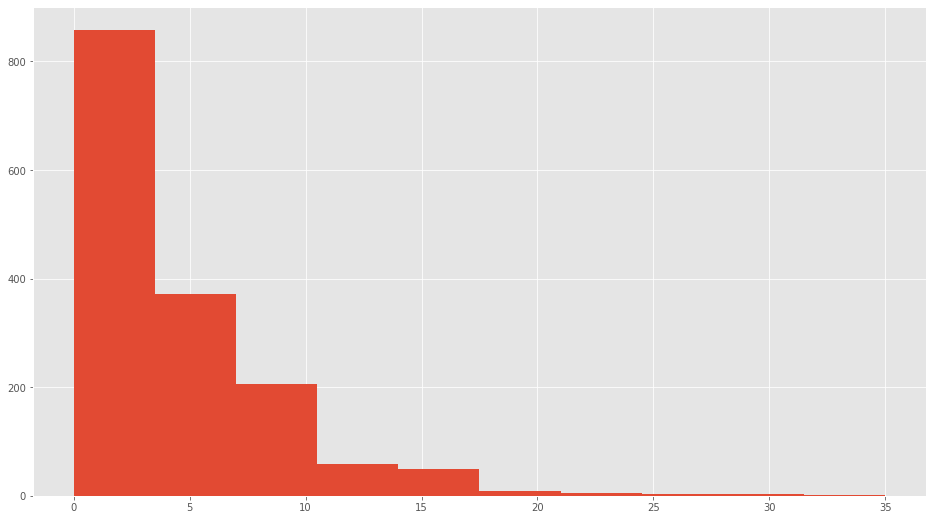

In [61]:
# store in a dataframe the cluster label 0
cluster_0 = variables[variables['hierarchical'] == 0]
plt.hist(cluster_0[['EDADDIF']])

### Edades de los hombres y las mujeres

<AxesSubplot:>

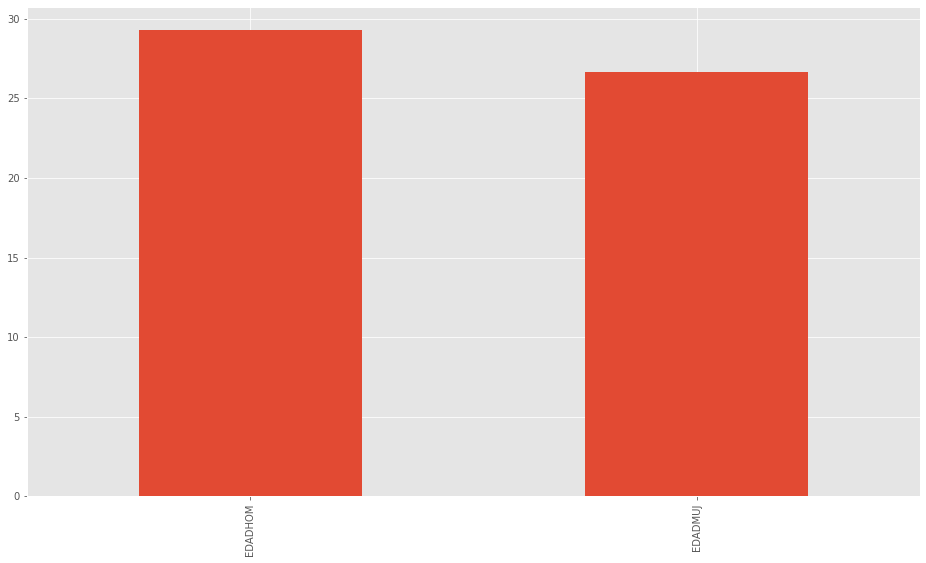

In [87]:
# plt pie chart for cluster 0 EDADHOM EDADMUJ avg label avg
# ESCHOMINT y otro de pie de ESCMUJINT
# def autopct_format(values):
#     def my_format(pct):
#         total = sum(values)
#         val = int(round(pct*total/100.0))
#         return '{v:d}'.format(v=val)
#     return my_format
# edadhombre = cluster_0['EDADHOM'].mean()
# edadmujer = cluster_0['EDADMUJ'].mean()
# grafico1 = plt.pie(cluster_0[['EDADHOM', 'EDADMUJ']].mean(), labels=['Hombre', 'Mujer'], autopct = autopct_format(cluster_0[['EDADHOM', 'EDADMUJ']].mean()), shadow=True, startangle=90 )
# plt.title('Promedio de edad por sexo')
# edadhombre, edadmujer

cluster_0[['EDADHOM', 'EDADMUJ']].mean().plot(kind='bar')




### Diferencia de edad sin valor absoluto

In [ ]:
#histograma de la diferencia de edad sin valor absoluto (EDADHOM - EDADMUJ)

<AxesSubplot:>

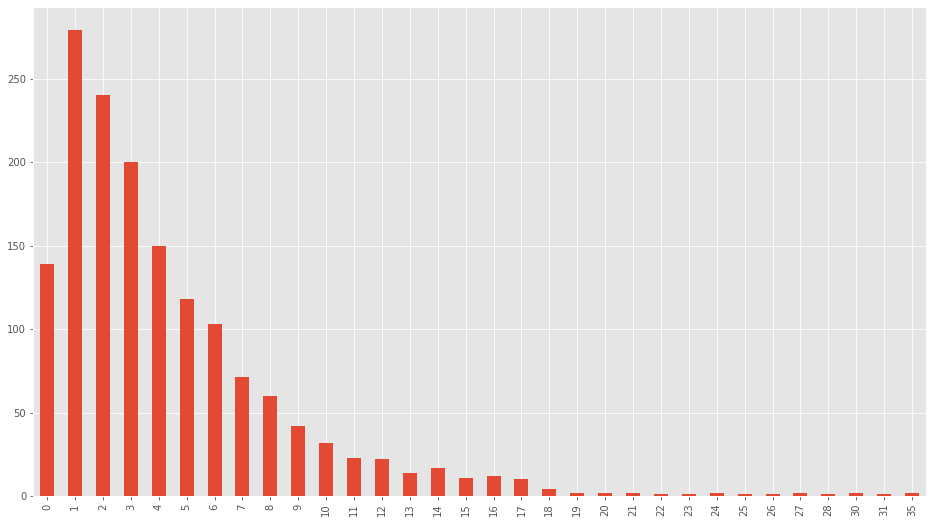

In [85]:
cluster_0['EDADDIF'].value_counts().sort_index().plot(kind='bar')

##### En la grafica de antes habiamos encontrado que en los menores de edad, las mujeres tienen mas edad que los hombres, pero en esta grafica podemos observar que en general los hombres tienen un promedio de edad mayor que el de las mujeres.

### Escolaridades del hombre y de la mujer

(array([[385.,   0., 498.,   0.,   0., 222.,   0., 412.,   0.,  50.],
        [243.,   0., 561.,   0.,   0., 262.,   0., 436.,   0.,  65.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 2 BarContainer objects>)

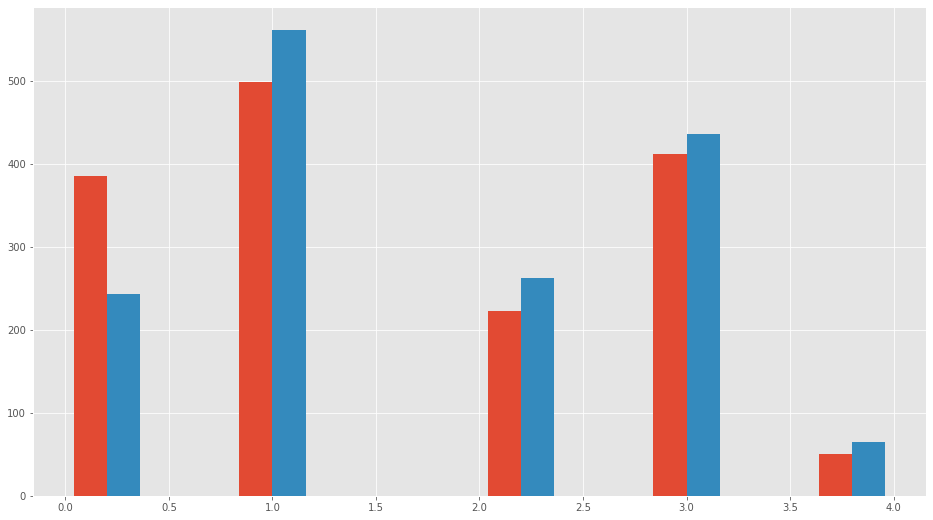

In [68]:
plt.hist(cluster_0[['ESCMUJINT', 'ESCHOMINT']])



## Para el cluster 1

(array([[7.220e+02, 2.498e+03, 1.091e+03, 3.870e+02, 1.870e+02, 1.350e+02,
         9.900e+01, 5.100e+01, 2.300e+01, 9.000e+00],
        [1.514e+03, 2.236e+03, 8.220e+02, 2.860e+02, 1.550e+02, 9.100e+01,
         6.100e+01, 2.800e+01, 8.000e+00, 1.000e+00]]),
 array([13. , 20.9, 28.8, 36.7, 44.6, 52.5, 60.4, 68.3, 76.2, 84.1, 92. ]),
 <a list of 2 BarContainer objects>)

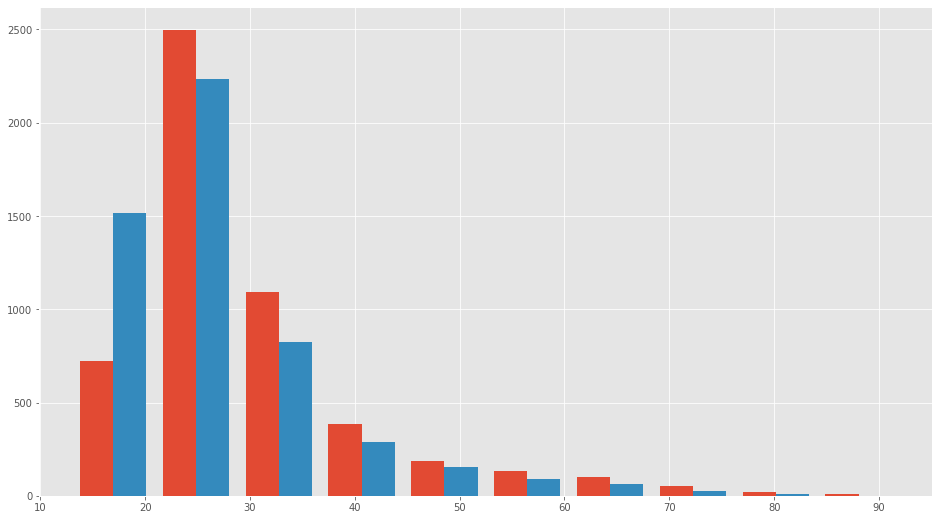

In [66]:
cluster_1 = variables[variables['hierarchical'] == 1]
plt.hist(cluster_1[['EDADHOM', 'EDADMUJ']])

<AxesSubplot:>

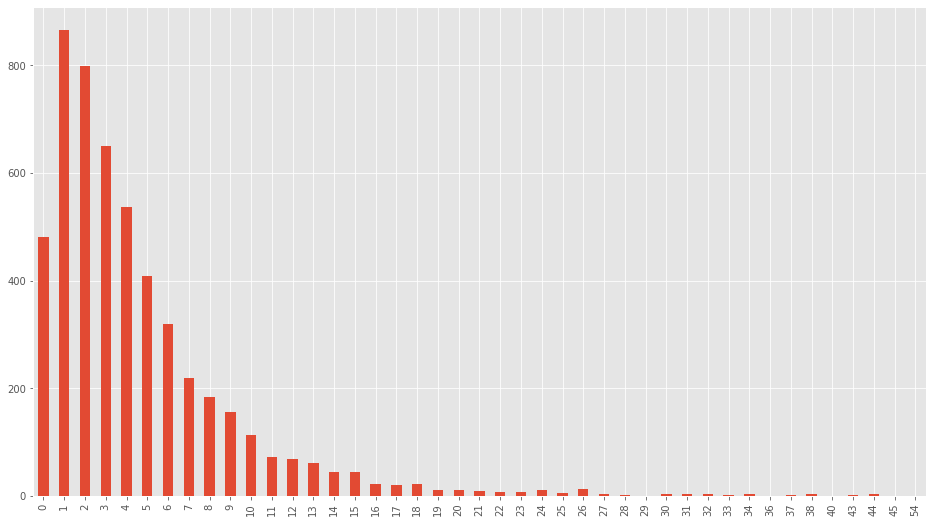

In [83]:
cluster_1['EDADDIF'].value_counts().sort_index().plot(kind='bar')


### Edades de los hombres y las mujeres

<AxesSubplot:>

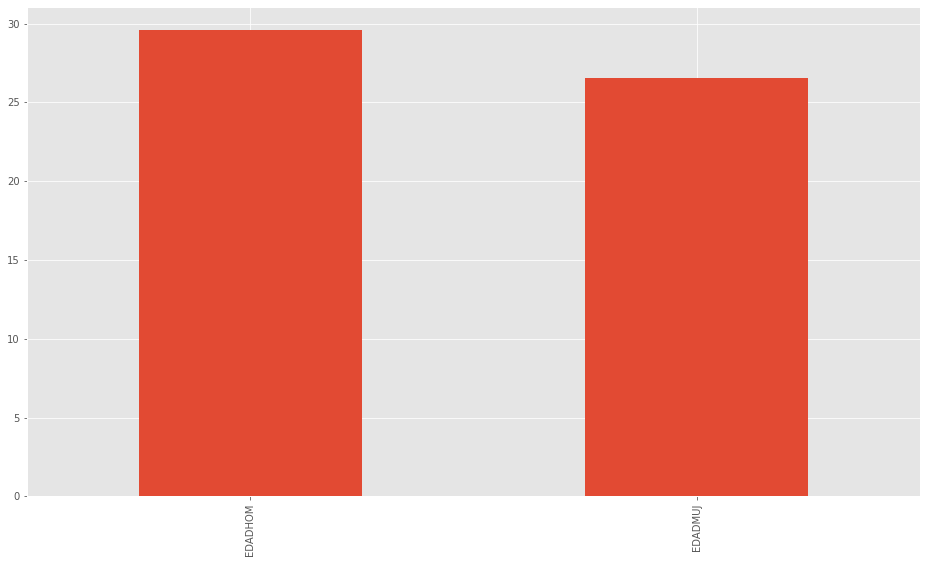

In [91]:
# plot the mean of the cluster 1 of EDADHOM and EDADMUJ
cluster_1[['EDADHOM', 'EDADMUJ']].mean().plot(kind='bar')


### Escolaridades de los hombres y las mujeres

(array([[1.278e+03, 0.000e+00, 1.602e+03, 0.000e+00, 7.630e+02, 0.000e+00,
         1.390e+03, 0.000e+00, 1.680e+02, 1.000e+00],
        [9.180e+02, 0.000e+00, 1.766e+03, 0.000e+00, 8.890e+02, 0.000e+00,
         1.420e+03, 0.000e+00, 2.080e+02, 1.000e+00]]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 2 BarContainer objects>)

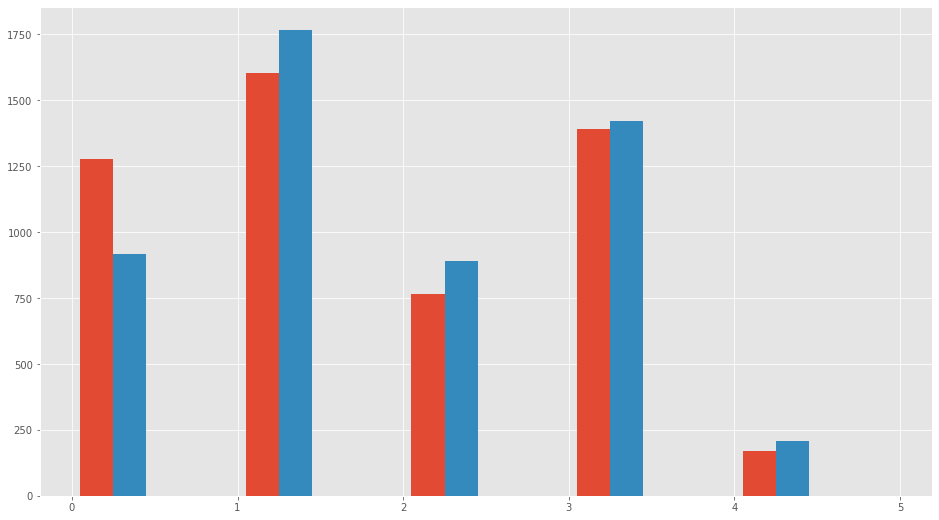

In [69]:
plt.hist(cluster_1[['ESCMUJINT', 'ESCHOMINT']])
